# PROYECTO FINAL - STATISTICAL LEARNING II

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [305]:
dataHP = pd.read_csv('House price.csv')
dataHP.shape 

(1460, 81)

## INGENIERIA DE CARACTERISTICAS

### IMPUTACION Y CODIFICACION

#### Extraemos columnas con NaN

In [306]:
#A estas columnas tenemos que hacerle algún tipo de imputación
cols_con_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [307]:
# Necesitamos conocer el tipo de datos de cada columna
# Si son numeros, la imputacion se hace de una forma y si son string se hace de otra forma
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [308]:
#Buscamos el porcentaje de NaN que tienen cada columna
#Un 5% es el maximo para hacer imputacion, mas de eso no vale la pena.
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()*100
prop_nan_per_col
#De estas columnas, hay 6 que no cumplen con el 5% maximo, hay 5 que se pasan solo un poco por lo que las tomaremos como dentro del maximo.

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### Casos especiales

In [309]:
# LotFrontage es del tipo numerico y tiene menos del 20% de nulos, procederemos a hacer la imputacion y verificar si puede quedarse.
dataHP['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [310]:
media = dataHP['LotFrontage'].mean()
mediana = dataHP['LotFrontage'].median()

print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 70.04995836802665
Mediana: 69.0


In [311]:
dataHP['Front_mean']=np.round(dataHP['LotFrontage'].fillna(media))
dataHP['Front_median']=np.round(dataHP['LotFrontage'].fillna(mediana))

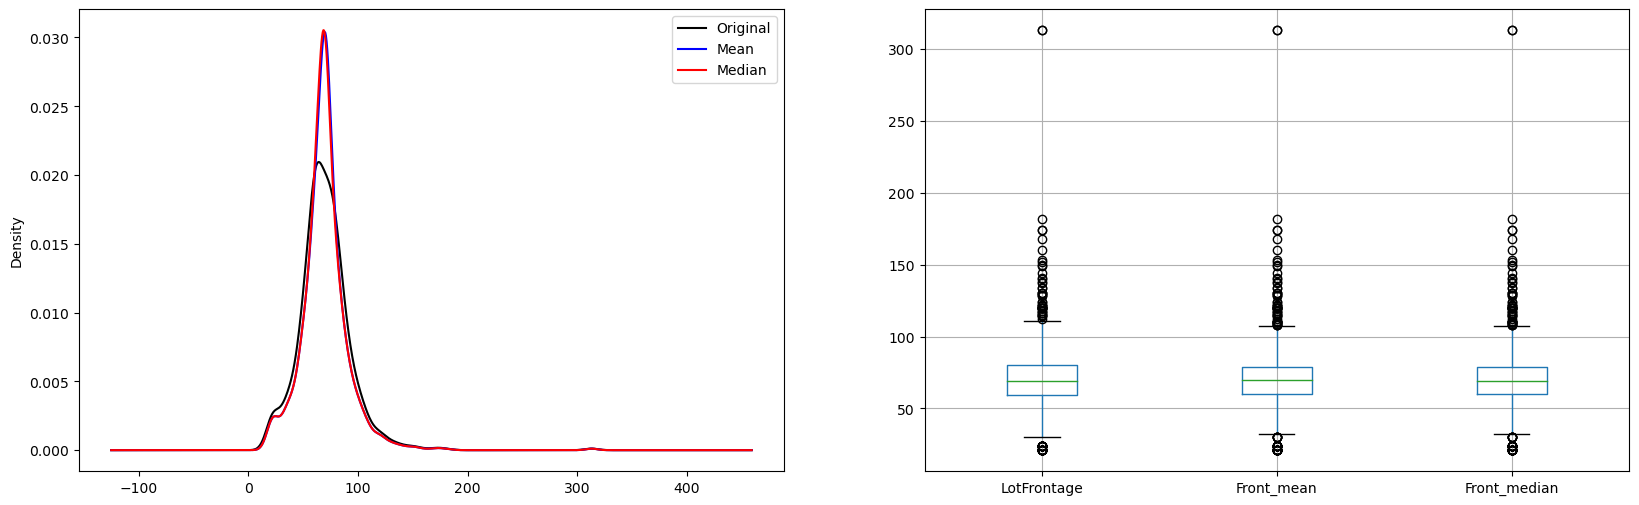

In [312]:
fig = plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
dataHP['LotFrontage'].plot.density(color='black', label='Original')
dataHP['Front_mean'].plot.density(color='blue', label='Mean')
dataHP['Front_median'].plot.density(color='red', label='Median')
plt.legend()

plt.subplot(1,2,2)
dataHP[['LotFrontage','Front_mean','Front_median']].boxplot()
plt.show()

#Observamos que se conserva la tendencia y las boxplot son muy similares, procedemos a rellenar los NaN con la media en LotFrontage

In [313]:
dataHP=dataHP.drop(columns=['Front_mean','Front_median'])
dataHP['LotFrontage'].fillna(media,inplace=True)

In [314]:
cols_con_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()*100
prop_nan_per_col


Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [315]:
#Otro caso especial es PoolQC
print(dataHP['PoolQC'].value_counts())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


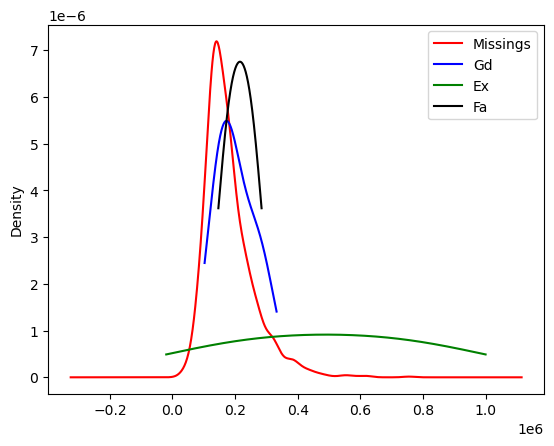

In [316]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP['PoolQC'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP['PoolQC'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP[dataHP['PoolQC'] == 'Ex']['SalePrice'].plot(kind="kde", color="green", label="Ex")
dataHP[dataHP['PoolQC'] == 'Fa']['SalePrice'].plot(kind="kde", color="black", label="Fa")
ax.legend()
plt.show()

In [317]:
dataHP.loc[:,['PoolQC','SalePrice']].nlargest(20,'SalePrice')
#La intencion inicial era reemplazar todos los NaN con una nueva catergia de "NO" para evitar la eliminacion de la columna
#Observamos que no hay relacion directa de la piscina con SalePrice, y hay muy pocos datos, por lo que se elimina la columna.
#De las 20 casas mas caras, solo una tiene piscina. Yo hubiera esperado que las mas caras tuvieran piscina.

PoolQC  SalePrice
691     NaN     755000
1182     Ex     745000
1169    NaN     625000
898     NaN     611657
803     NaN     582933
1046    NaN     556581
440     NaN     555000
769     NaN     538000
178     NaN     501837
798     NaN     485000
185     NaN     475000
1373    NaN     466500
1243    NaN     465000
591     NaN     451950
527     NaN     446261
473     NaN     440000
58      NaN     438780
349     NaN     437154
496     NaN     430000
389     NaN     426000

In [318]:
cols_rescatables = [col for col in dataHP.columns 
                        if( (dataHP[col].isnull().mean()<=0.056))]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3Ssn

In [319]:
cols_norescatables = [col for col in dataHP.columns 
                        if( (dataHP[col].isnull().mean()>0.056))]
cols_norescatables

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [320]:
#Verificamos la forma que tomaria el dataset
dataHP[cols_rescatables].shape,dataHP.shape


((1460, 76), (1460, 81))

In [321]:
#Realizamos eliminacion de columnas con mayor a 5% de datos faltantes
dataHP=dataHP.drop(columns=cols_norescatables)
dataHP.shape

(1460, 76)

### Imputacion variables numericas

In [322]:
#Encontramos las columnas que cumplen con el limite de 5% NaNs

cols_rescatables_num = [col for col in dataHP.columns 
                        if((dataHP[col].isnull().mean()>0) and 
                           (dataHP[col].isnull().mean()<=0.056)and
                           (dataHP[col].dtypes=='float64'))]
cols_rescatables_num

['MasVnrArea', 'GarageYrBlt']

In [323]:
#Realizamos la imputacion de la misma manera que lo hicimos con LotFrontage reemplazando con la media

-----------MasVnrArea---------
Media: 103.68526170798899
Mediana: 0.0


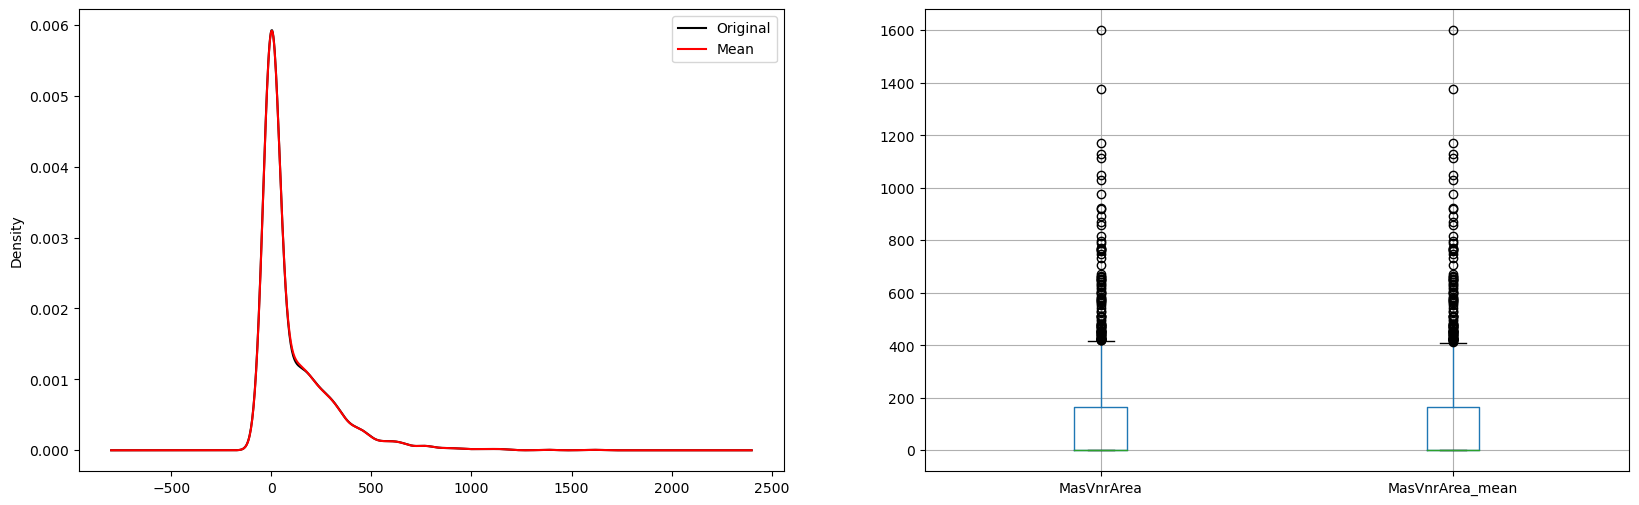

-----------GarageYrBlt---------
Media: 1978.5061638868744
Mediana: 1980.0


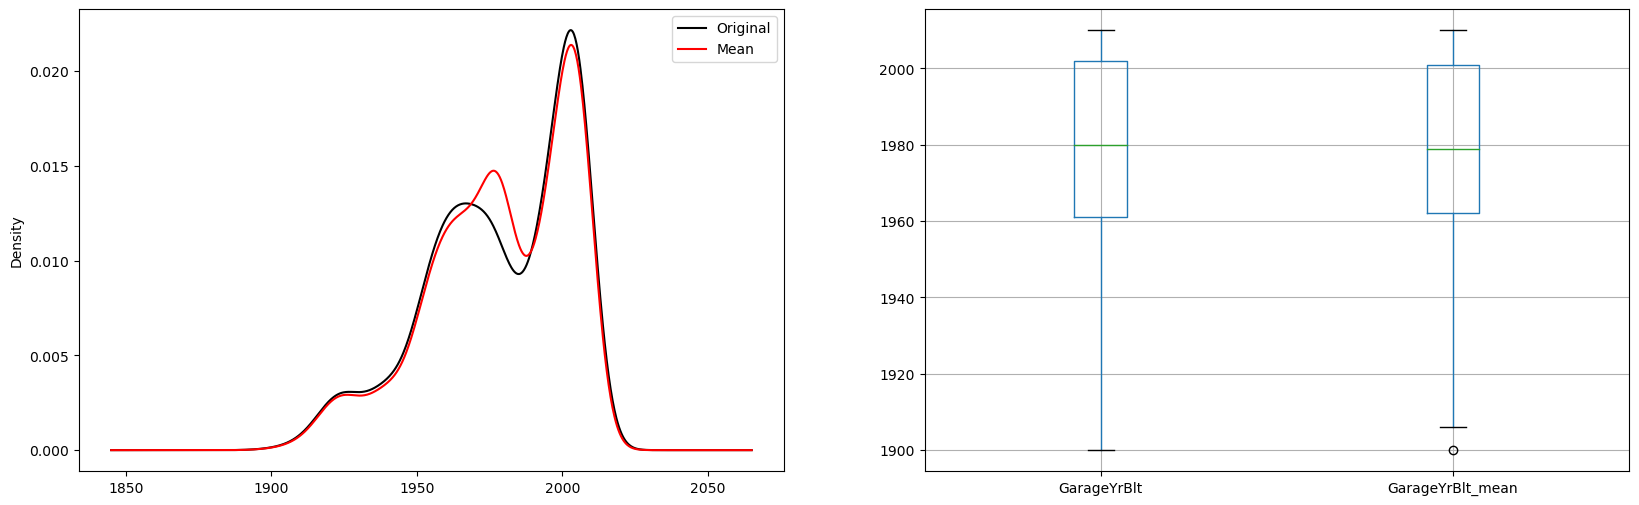

In [324]:
for col in cols_rescatables_num:
    media = dataHP[col].mean()
    mediana = dataHP[col].median()

    print(f'-----------{col}---------')
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")

    col_name= f'{col}_mean'

    dataHP[col_name]=np.round(dataHP[col].fillna(media))

    fig = plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    dataHP[col].plot.density(color='black', label='Original')
    dataHP[col_name].plot.density(color='red', label='Mean')
    plt.legend()

    plt.subplot(1,2,2)
    dataHP[[col,col_name]].boxplot()
    plt.show()

    dataHP=dataHP.drop(columns=[col_name])
    dataHP[col].fillna(media,inplace=True)


In [325]:
print(dataHP.shape)
print(dataHP[cols_rescatables_num].isnull().mean())

(1460, 76)
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64


### Imputacion variables categoricas

In [326]:
cols_rescatables_cat = [col for col in dataHP.columns 
                        if((dataHP[col].isnull().mean()>0) and 
                           (dataHP[col].isnull().mean()<=0.056)and
                           (dataHP[col].dtypes=='object'))]
cols_rescatables_cat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [327]:
for col in cols_rescatables_cat:
     print(f'----{col}---- \n {dataHP[col].value_counts()}')

----MasVnrType---- 
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
----BsmtQual---- 
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
----BsmtCond---- 
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
----BsmtExposure---- 
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
----BsmtFinType1---- 
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
----BsmtFinType2---- 
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
----Electrical---- 
 SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
----GarageType---- 
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
----GarageFinish---- 
 Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
----Garag

In [328]:
for col in cols_rescatables_cat:
    print(f'Column: {col}')
    for val in dataHP[col].dropna().unique():
        count = (dataHP[col]==val).sum()
        print(val,count)
    print()

Column: MasVnrType
BrkFace 445
None 864
Stone 128
BrkCmn 15

Column: BsmtQual
Gd 618
TA 649
Ex 121
Fa 35

Column: BsmtCond
TA 1311
Gd 65
Fa 45
Po 2

Column: BsmtExposure
No 953
Gd 134
Mn 114
Av 221

Column: BsmtFinType1
GLQ 418
ALQ 220
Unf 430
Rec 133
BLQ 148
LwQ 74

Column: BsmtFinType2
Unf 1256
BLQ 33
ALQ 19
Rec 54
LwQ 46
GLQ 14

Column: Electrical
SBrkr 1334
FuseF 27
FuseA 94
FuseP 3
Mix 1

Column: GarageType
Attchd 870
Detchd 387
BuiltIn 88
CarPort 9
Basment 19
2Types 6

Column: GarageFinish
RFn 422
Unf 605
Fin 352

Column: GarageQual
TA 1311
Fa 48
Gd 14
Ex 3
Po 3

Column: GarageCond
TA 1326
Fa 35
Gd 9
Po 7
Ex 2



In [329]:
#Electrical solo tiene un nan, haremos la imputacion directa porque da un error en la grafica, asignamos al que tiene mayor valor
dataHP['Electrical'].fillna('SBrkr',inplace=True)

In [330]:
dataHP['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [331]:
#volvemos a determinar las columnas categoricas rescatables
cols_rescatables_cat = [col for col in dataHP.columns 
                        if((dataHP[col].isnull().mean()>0) and 
                           (dataHP[col].isnull().mean()<=0.056)and
                           (dataHP[col].dtypes=='object'))]
cols_rescatables_cat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

Column: MasVnrType


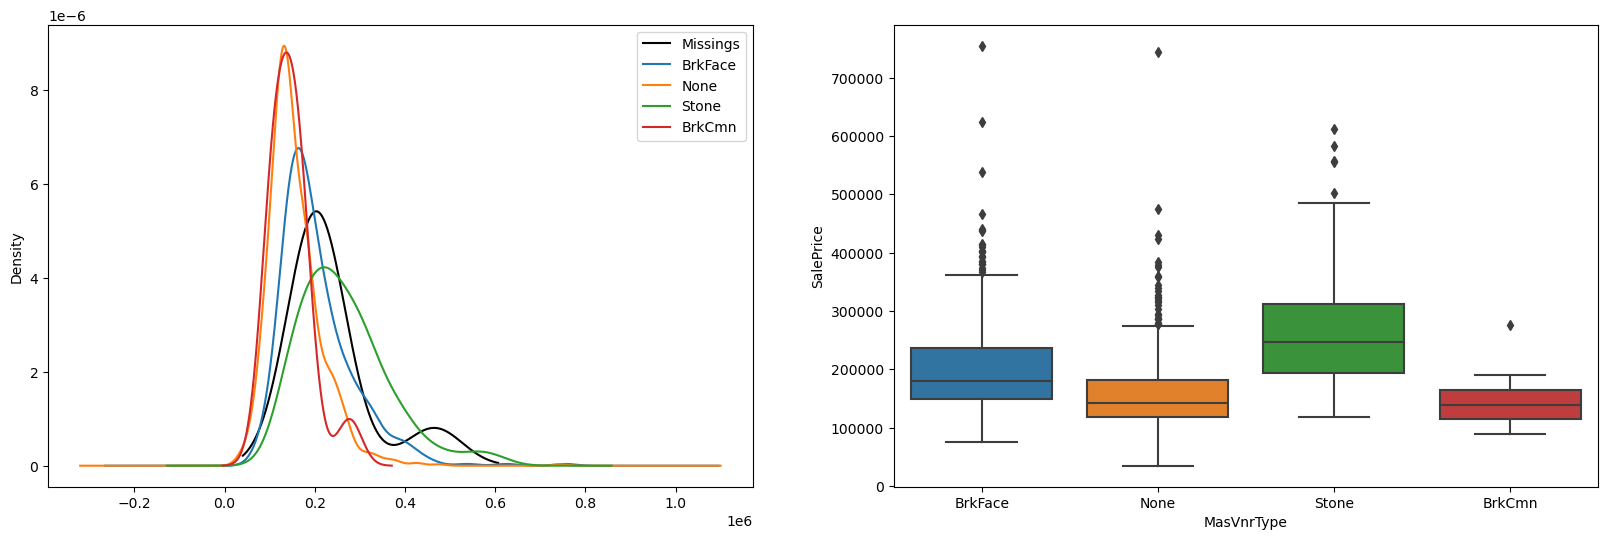

Column: BsmtQual


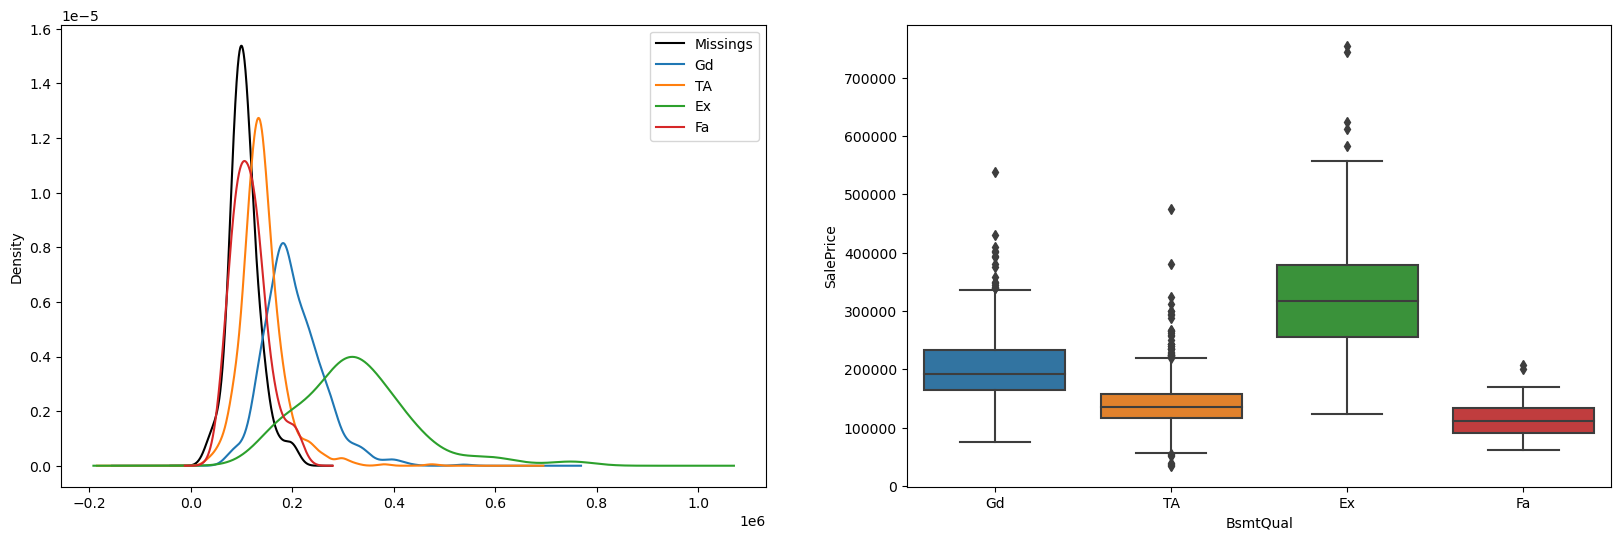

Column: BsmtCond


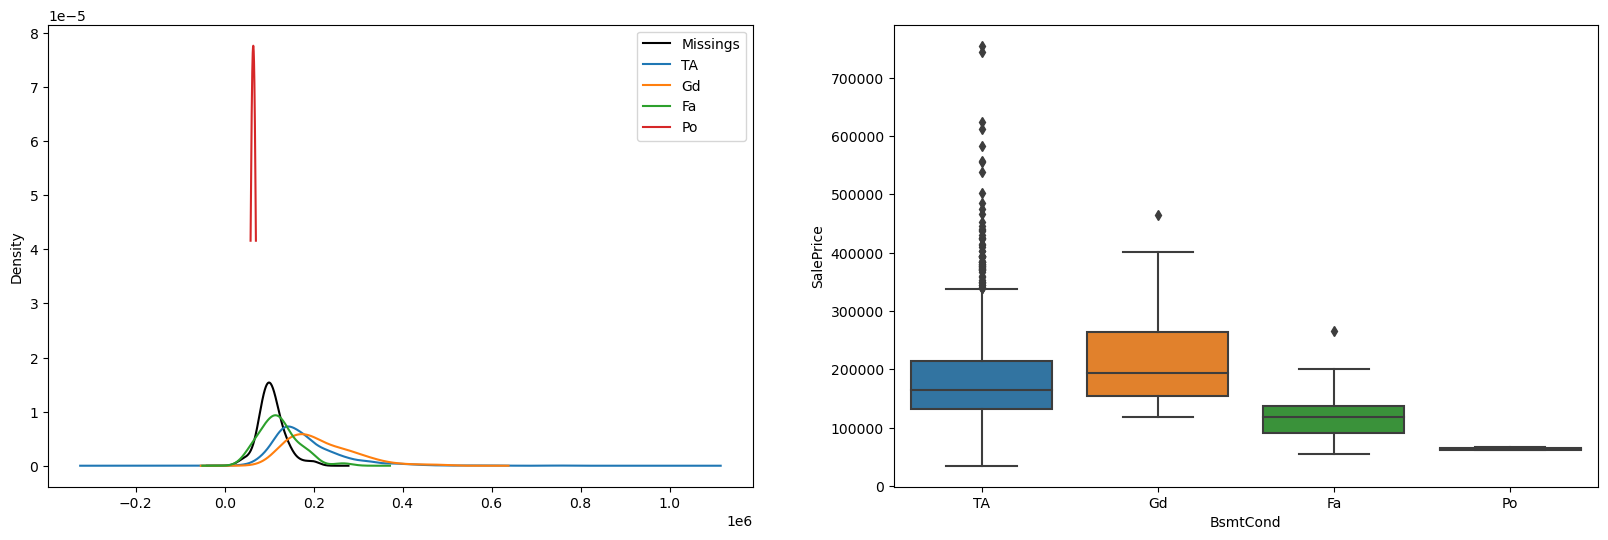

Column: BsmtExposure


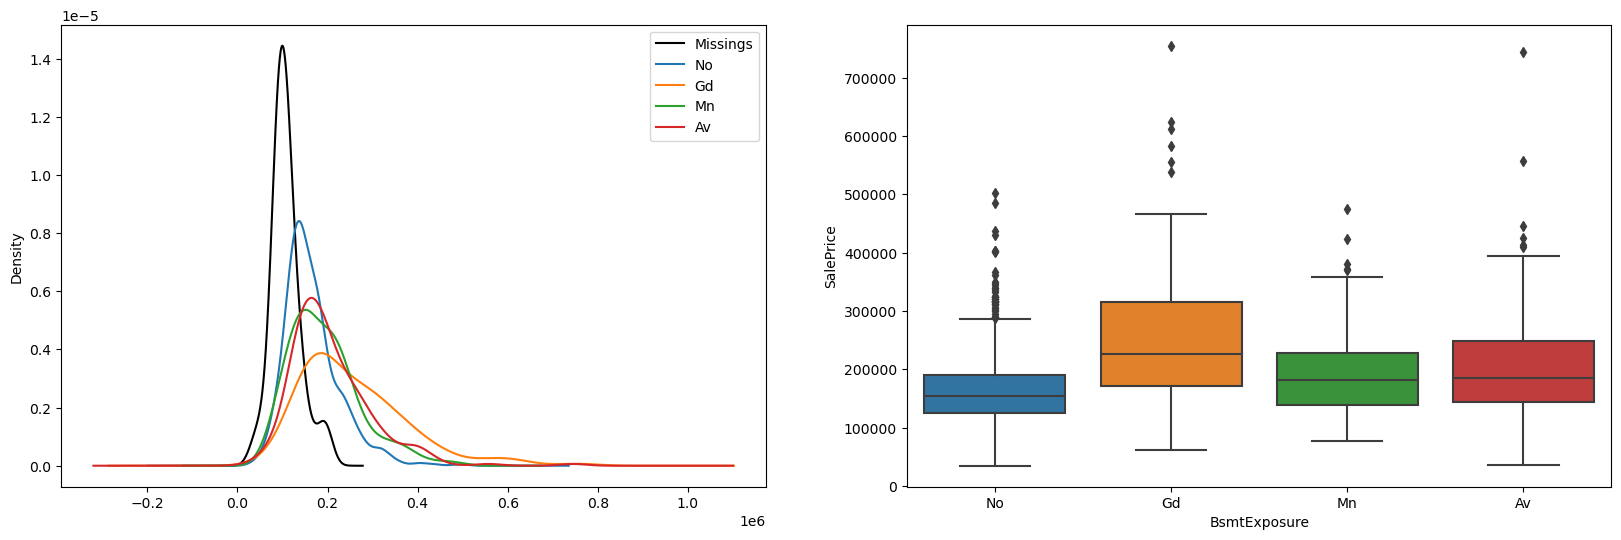

Column: BsmtFinType1


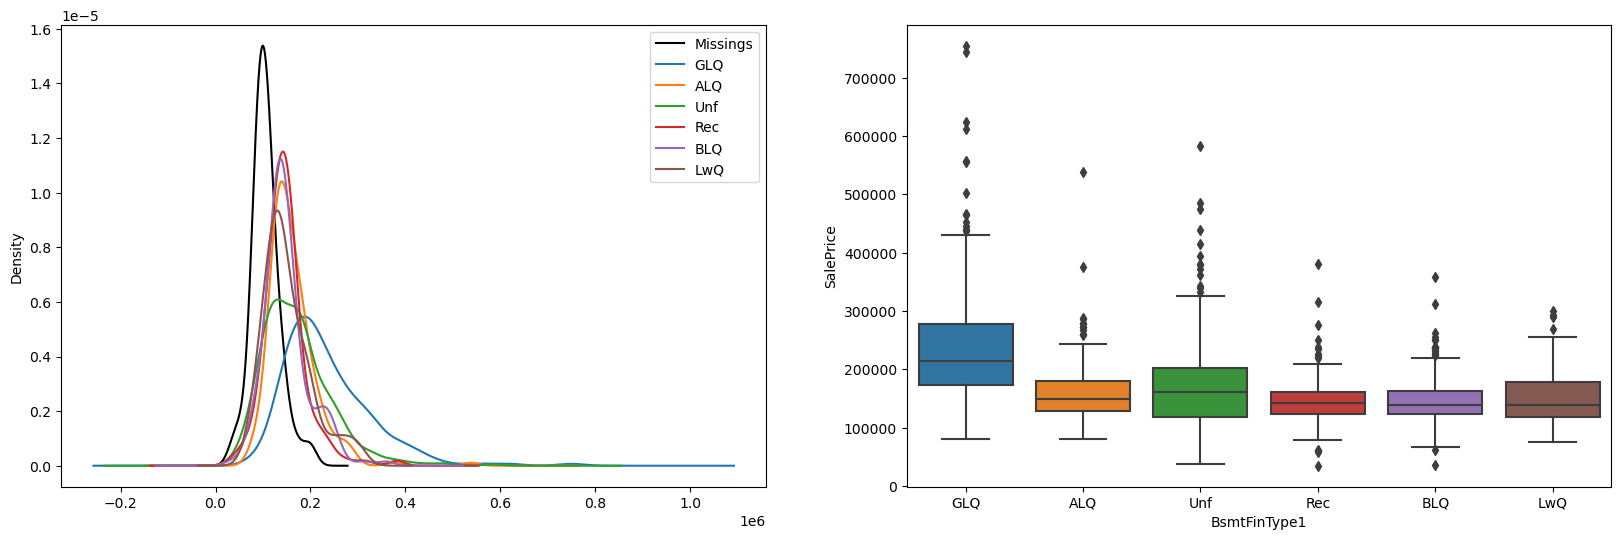

Column: BsmtFinType2


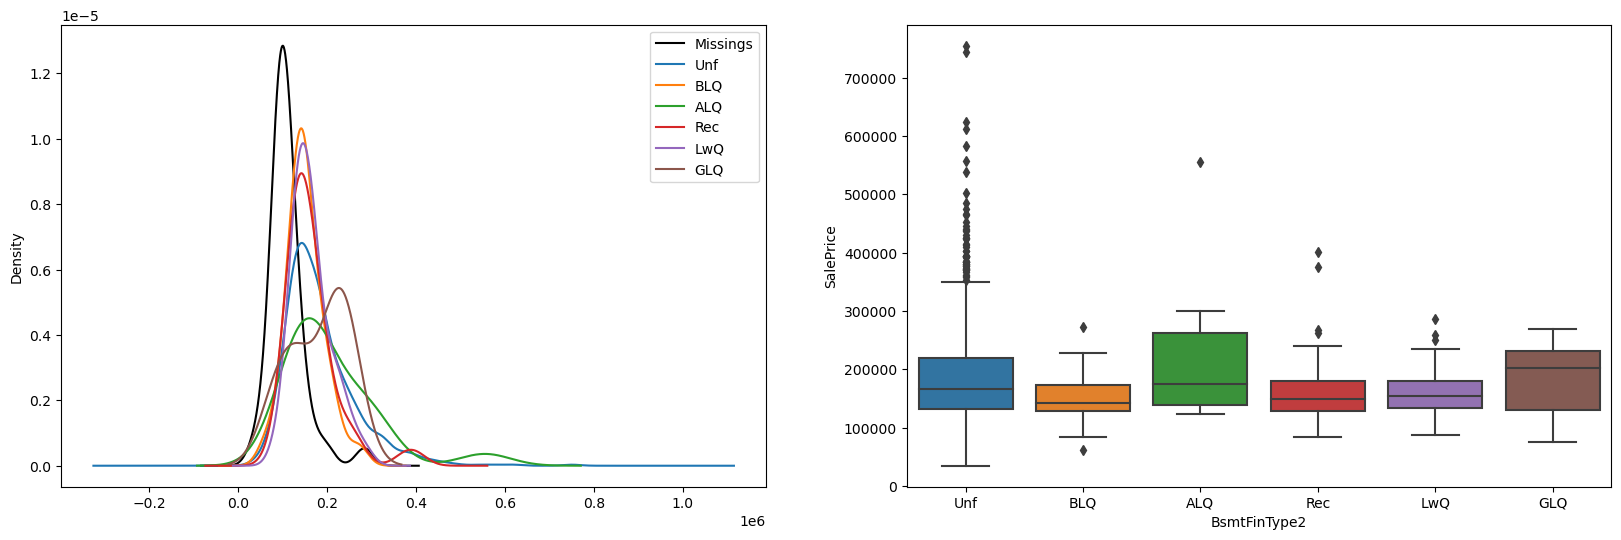

Column: GarageType


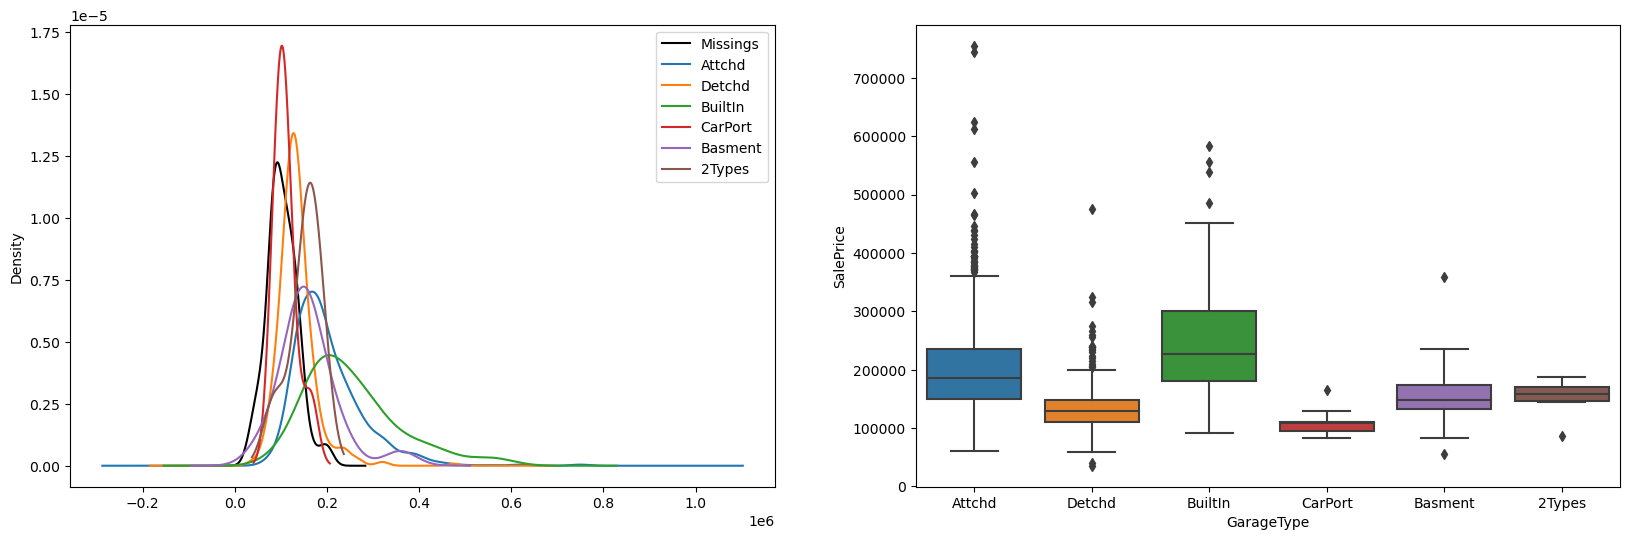

Column: GarageFinish


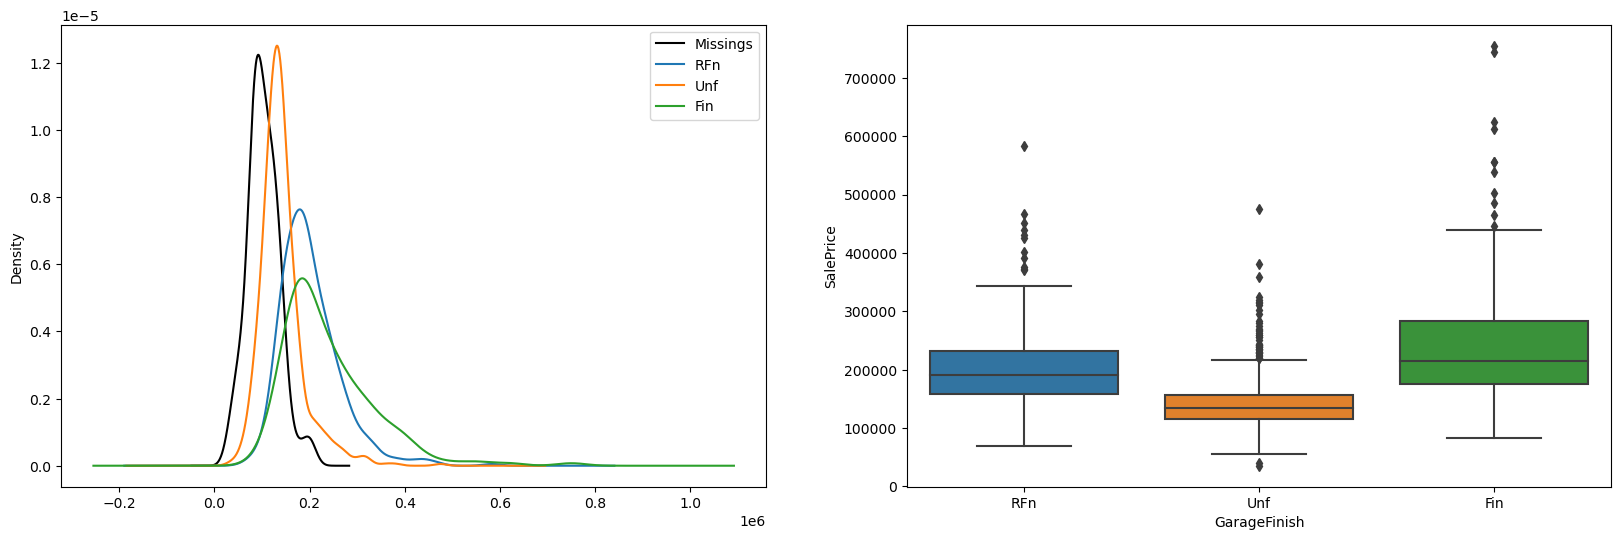

Column: GarageQual


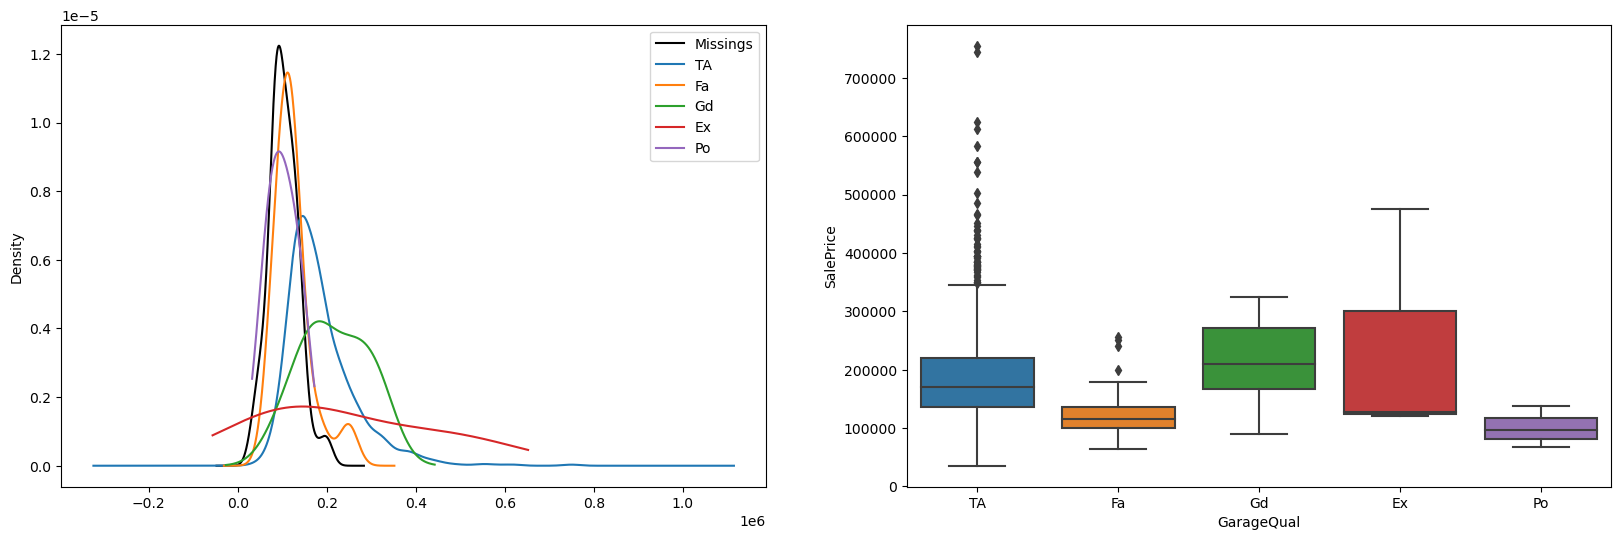

Column: GarageCond


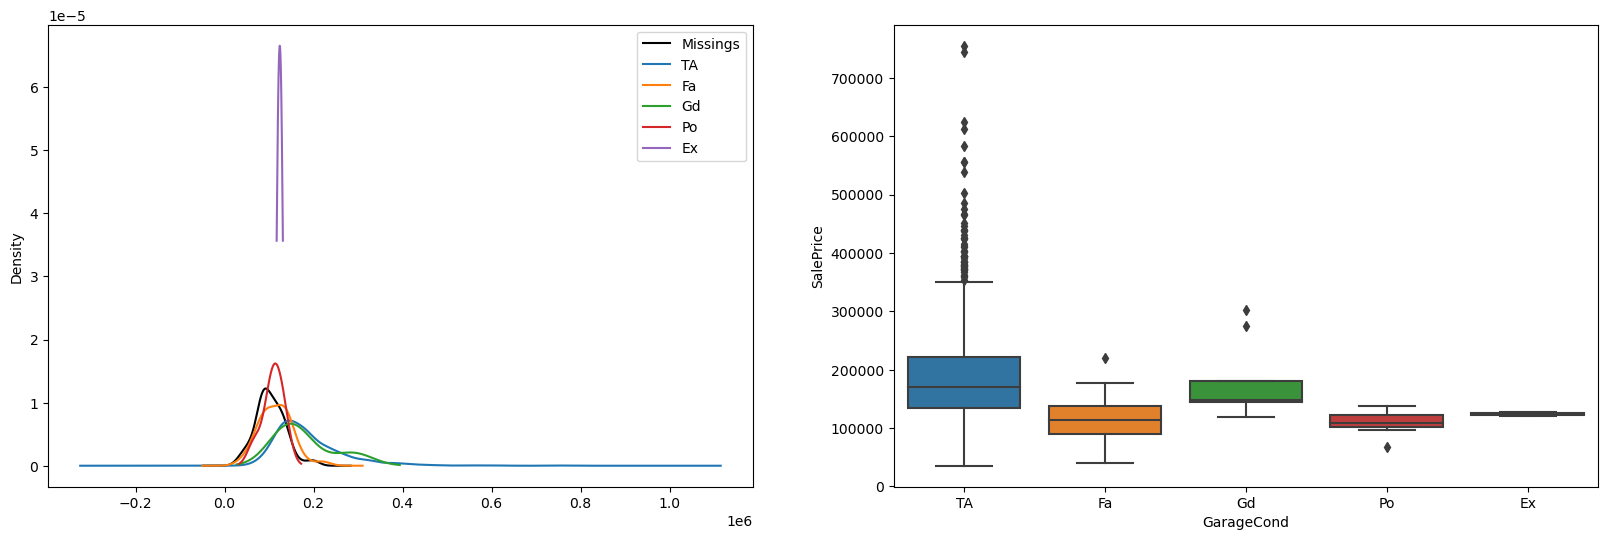

In [332]:
for col in cols_rescatables_cat:
    print(f'Column: {col}')
    fig = plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    dataHP[dataHP[col].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missings")
    for val in dataHP[col].dropna().unique():
        count = (dataHP[col]==val).sum()
        dataHP[dataHP[col] == val]['SalePrice'].plot(kind="kde", label=val)
    plt.legend()
    
    plt.subplot(1,2,2)
    sns.boxplot(x=dataHP[col],y=dataHP['SalePrice'])
    plt.show()

In [333]:
#La imputacion se hace manualmente ya que el relleno de los NaN se hara en valores diferentes
#Se hace la imputacion de acuerdo a las graficas, las que mas se acerquen entre si a Missings, se hace la imputacion

dataHP['MasVnrType'].fillna('Stone',inplace=True)
dataHP['BsmtQual'].fillna('Fa',inplace=True)
dataHP['BsmtCond'].fillna('Fa',inplace=True)
dataHP['BsmtExposure'].fillna('No',inplace=True)
dataHP['BsmtFinType1'].fillna('Rec',inplace=True)
dataHP['BsmtFinType2'].fillna('BLQ',inplace=True)
dataHP['GarageType'].fillna('CarPort',inplace=True)
dataHP['GarageFinish'].fillna('Unf',inplace=True)
dataHP['GarageQual'].fillna('Fa',inplace=True)
dataHP['GarageCond'].fillna('Fa',inplace=True)


In [334]:
#Verificamos que ya no haya ningun NaN
cols_con_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()*100
prop_nan_per_col

Series([], dtype: float64)

### Codificacion de Variables Categoricas

In [335]:
def getCategoryVars(dataset):
    cat_colnames = []
    colnames = dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

#se creo una variable vacia, se buscto uno por uno el tipo de variable de cada columna y si es objeto o sea categorica entonces
#se almancena en la variable 

In [336]:
#Extraemos las variables categoricas
cat_cols=getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [337]:
#Un vistazo rapido del dataset solo con las variables categoricas
dataset_categories = dataHP[cat_cols]
dataset_categories.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 38 columns]

In [338]:
dataset_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [339]:
#Probamos realizar la codificacion por medio de One Hot Encoding.
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 234 entries, MSZoning_C (all) to SaleCondition_Partial
dtypes: uint8(234)
memory usage: 333.8 KB


In [340]:
#Tiene menos memoria pero eso no lo hace mas facil de procesar ya que tiene mas de 5 veces el numero de columnas.
#Elegimos Frecuency encoding debido al gran numero de columnas que ya tiene el dataset


### Frecuency encoding

In [341]:
for col in dataset_categories:
    print(f'-----------{col}---------')
    col_name= f'{col}_freq_mapper'
    col_name = (dataset_categories[col].value_counts().sort_values(ascending=False)).to_dict()
    print(col_name)
    col_code= f'{col}_code'
    dataHP[col_code]=dataset_categories[col].map(col_name)


-----------MSZoning---------
{'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10}
-----------Street---------
{'Pave': 1454, 'Grvl': 6}
-----------LotShape---------
{'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
-----------LandContour---------
{'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36}
-----------Utilities---------
{'AllPub': 1459, 'NoSeWa': 1}
-----------LotConfig---------
{'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4}
-----------LandSlope---------
{'Gtl': 1382, 'Mod': 65, 'Sev': 13}
-----------Neighborhood---------
{'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'StoneBr': 25, 'SWISU': 25, 'MeadowV': 17, 'Blmngtn': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2}
-----------Condition1---------
{'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn

In [342]:
#Probando
dataHP[['LotShape_code','LotShape']]

LotShape_code LotShape
0               925      Reg
1               925      Reg
2               484      IR1
3               484      IR1
4               484      IR1
...             ...      ...
1455            925      Reg
1456            925      Reg
1457            925      Reg
1458            925      Reg
1459            925      Reg

[1460 rows x 2 columns]

In [343]:
# Eliminamos las columnas con datos categoricos
dataHP = dataHP.drop(columns=cat_cols)
dataHP

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  Electrical_code  \
0          2003          2003       196.0         706  ...             1335   
1          1976          1976         0.0         978  ...             1335   
2          2001          2002       162.0         486  ...             1335   
3          1915          1970         0.0         216  ...             1335   
4          2000          2000       350.0         655  ...             1335   
...         ...           ...         ...         ...  ...              ...   
1455       1999          2000         0.0           0  ...             1335   
1456       1978          1988       119.0         790  ...             1335   
1457       1941          2006         0.0         275  ...             1335   
1458       1950          1996         0.0          49  ...               94   
1459       1965          1965         0.0         830  ...             1335   

      KitchenQual_code  Functional_code  GarageType_code  GarageFinish_code  \
0                  586             1360              870                422   
1                  735             1360              870                422   
2                  586             1360              870                422   
3                  586             1360              387                686   
4                  586             1360              870                422   
...                ...              ...              ...                ...   
1455               735             1360              870                422   
1456               735               31              870                686   
1457               586             1360              870                422   
1458               586             1360              870                686   
1459               735             1360              870                352   

      GarageQual_code  GarageCond_code  PavedDrive_code  SaleType_code  \
0                1311             1326             1340           1267   
1                1311             1326             1340           1267   
2                1311             1326             1340           1267   
3                1311             1326             1340           1267   
4                1311             1326             1340           1267   
...               ...              ...              ...            ...   
1455             1311             1326             1340           1267   
1456             1311             1326             1340           1267   
1457             1311             1326             1340           1267   
1458             1311             1326             1340           1267   
1459             1311             1326             1340           1267   

      SaleCondition_code  
0                   1198  
1                   1198  
2                   1198  
3                    101  
4                   1198  
...                  ...  
1455                1198  
1456                1198  
1457                1198  
1458                1198  
1459                1198  

[1460 r

In [344]:
dataHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   OverallQual         1460 non-null   int64  
 5   OverallCond         1460 non-null   int64  
 6   YearBuilt           1460 non-null   int64  
 7   YearRemodAdd        1460 non-null   int64  
 8   MasVnrArea          1460 non-null   float64
 9   BsmtFinSF1          1460 non-null   int64  
 10  BsmtFinSF2          1460 non-null   int64  
 11  BsmtUnfSF           1460 non-null   int64  
 12  TotalBsmtSF         1460 non-null   int64  
 13  1stFlrSF            1460 non-null   int64  
 14  2ndFlrSF            1460 non-null   int64  
 15  LowQualFinSF        1460 non-null   int64  
 16  GrLivA

In [345]:
dataHP.shape

(1460, 76)

In [346]:
#Verificamos que no quede ninguna variable categorica
cat_cols=getCategoryVars(dataHP)
cat_cols

[]

## OUTLIERS

### Definimos las variables numericas

In [347]:
#Usamos el dataset de dataHP

def getColumnTypes(dataHP):
    #Podemos hacer comentarios de varias lineas con '''
    ''' Descripcion: Esta funcion extrae el tipo de dominio de las columnas de un dataset.
        Entradas: Pandas Dataframe
        Salida: Tupla como arreglo que contiene nombres de las columnas'''
    
    continuas = []
    discretas = []
    categoricas = []
    for col in dataHP.columns:
        if((dataHP[col].dtype=='int64') or (dataHP[col].dtype=='float64')):
            if(len(dataHP[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [348]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_code', 'Street_code', 'LotShape_code', 'LandContour_code', 'Utilities_code', 'LotConfig_code', 'LandSlope_code', 'Neighborhood_code', 'Condition1_code', 'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code', 'Foundation_code', 'BsmtQual_code', 'BsmtCond_code', 'BsmtExposure_code', 'BsmtFinType1_code', 'BsmtFinType2_code', 'Heating_code',

In [349]:
dataHP[discretas]

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0             60            7            5             0             1   
1             20            6            8             0             0   
2             60            7            5             0             1   
3             70            7            5             0             1   
4             60            8            5             0             1   
...          ...          ...          ...           ...           ...   
1455          60            6            5             0             0   
1456          20            6            6             0             1   
1457          70            7            9             0             0   
1458          20            5            6             0             1   
1459          20            5            6             0             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  ...  \
0                0         2         1             3             1  ...   
1                1         2         0             3             1  ...   
2                0         2         1             3             1  ...   
3                0         1         0             3             1  ...   
4                0         2         1             4             1  ...   
...            ...       ...       ...           ...           ...  ...   
1455             0         2         1             3             1  ...   
1456             0         2         0             3             1  ...   
1457             0         2         0             4             1  ...   
1458             0         1         0             2             1  ...   
1459             0         1         1             3             1  ...   

      Electrical_code  KitchenQual_code  Functional_code  GarageType_code  \
0                1335               586             1360              870   
1                1335               735             1360              870   
2                1335               586             1360              870   
3                1335               586             1360              387   
4                1335               586             1360              870   
...               ...               ...              ...              ...   
1455             1335               735             1360              870   
1456             1335               735               31              870   
1457             1335               586             1360              870   
1458               94               586             1360              870   
1459             1335               735             1360              870   

      GarageFinish_code  GarageQual_code  GarageCond_code  PavedDrive_code  \
0                   422             1311             1326             1340   
1                   422             1311             1326             1340   
2                   422             1311             1326             1340   
3                   686             1311             1326             1340   
4                   422             1311             1326             1340   
...                 ...              ...              ...              ...   
1455                422             1311             1326             1340   
1456                686             1311             1326             1340   
1457                422             1311             1326             1340   
1458                686             1311             1326             1340   
1459                352             1311             1326             1340   

      SaleType_code  SaleCondition_code  
0              1267                1198  
1              1267                1198  
2              1267                1198  
3              1267                 101  
4              1267                1198  
...             ...                 ...  
1455           1267                1198  
1456           126

In [350]:
def plotDistBoxQQ(dataHP,col):

    ''' 
    Descripcion: Muestra las graficas de Distribucion, Boxplot y QQ-Plot para detectar Outliers
    Input: dataset-> pandas dataframe, col->string con nombre de columnas
    output: visualizacion de plots
    '''
    
    print(f"-------{col}----------")
    
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(dataHP[col], bins=30)
    plt.title("Histograma y densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataHP[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataHP[col],dist="norm",plot=plt)
    plt.title("Q-Q Plot")

-------Id----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


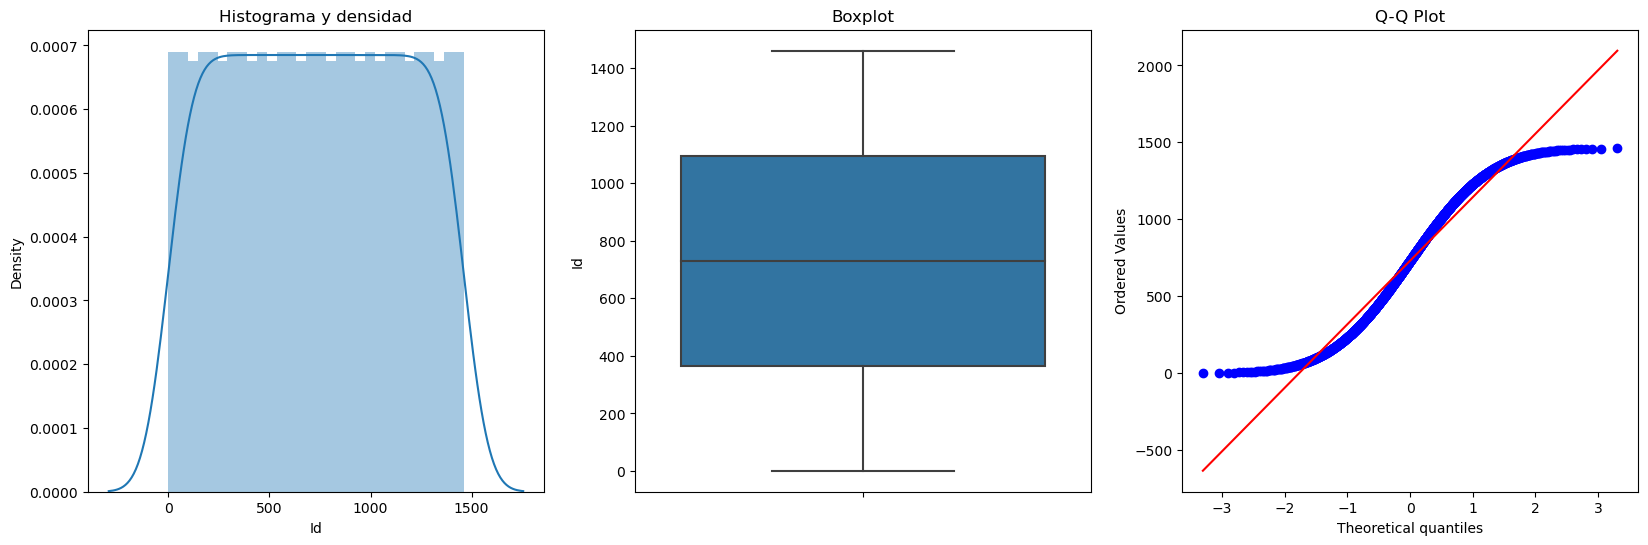

-------LotFrontage----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


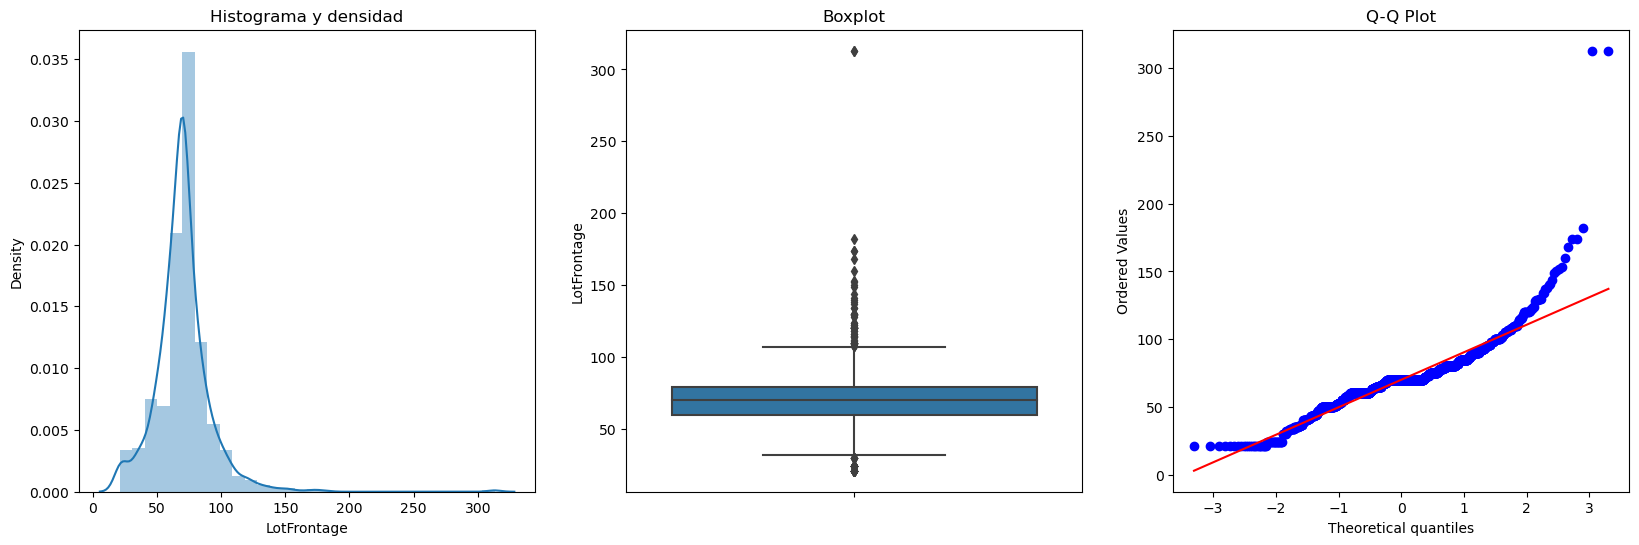

-------LotArea----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


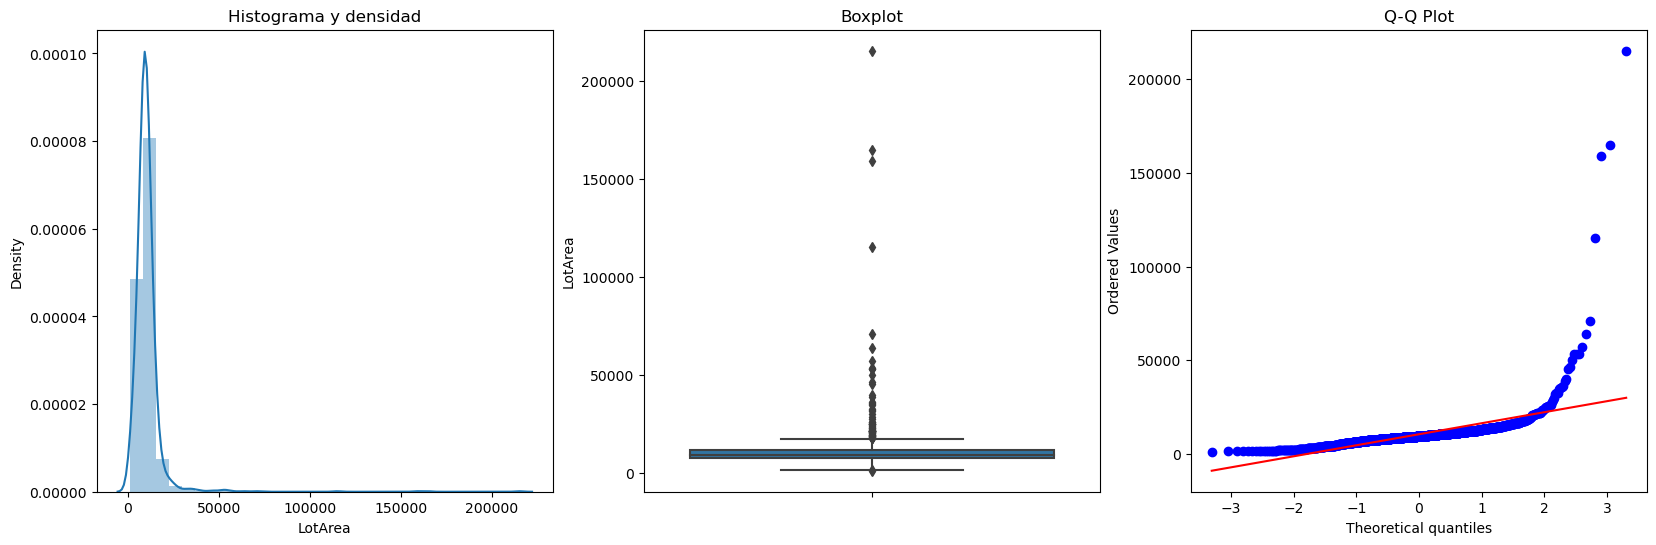

-------YearBuilt----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


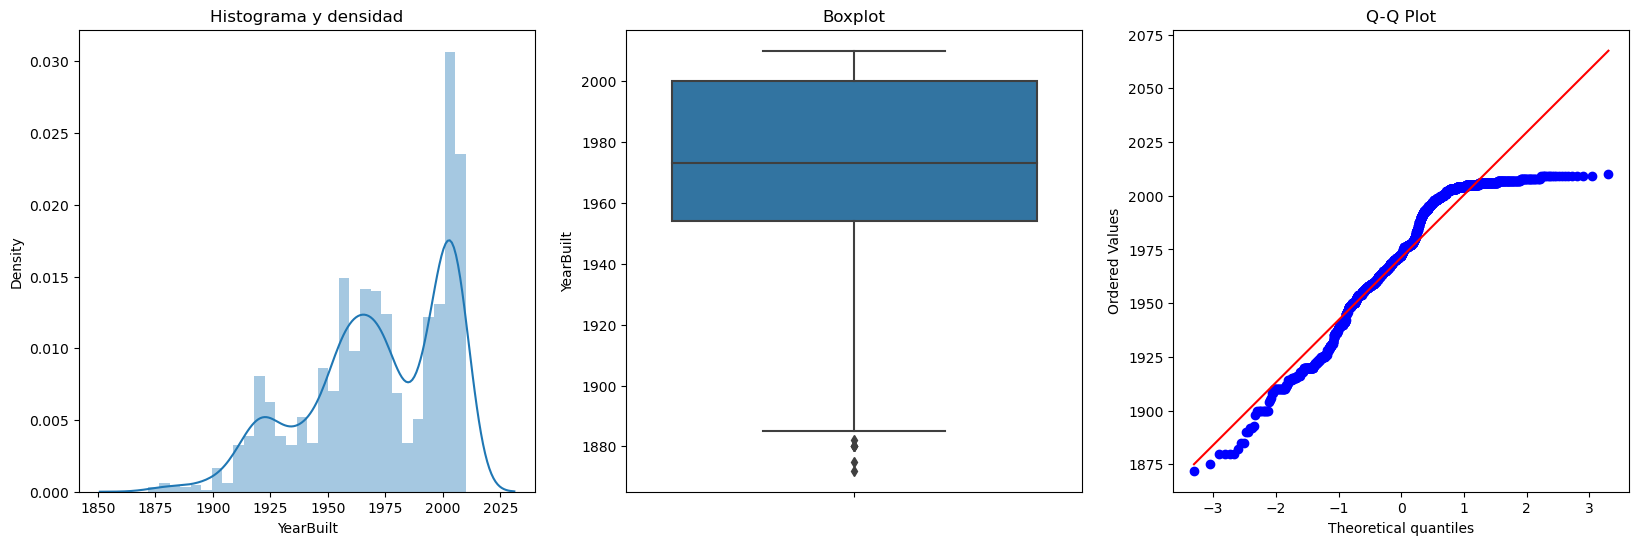

-------YearRemodAdd----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


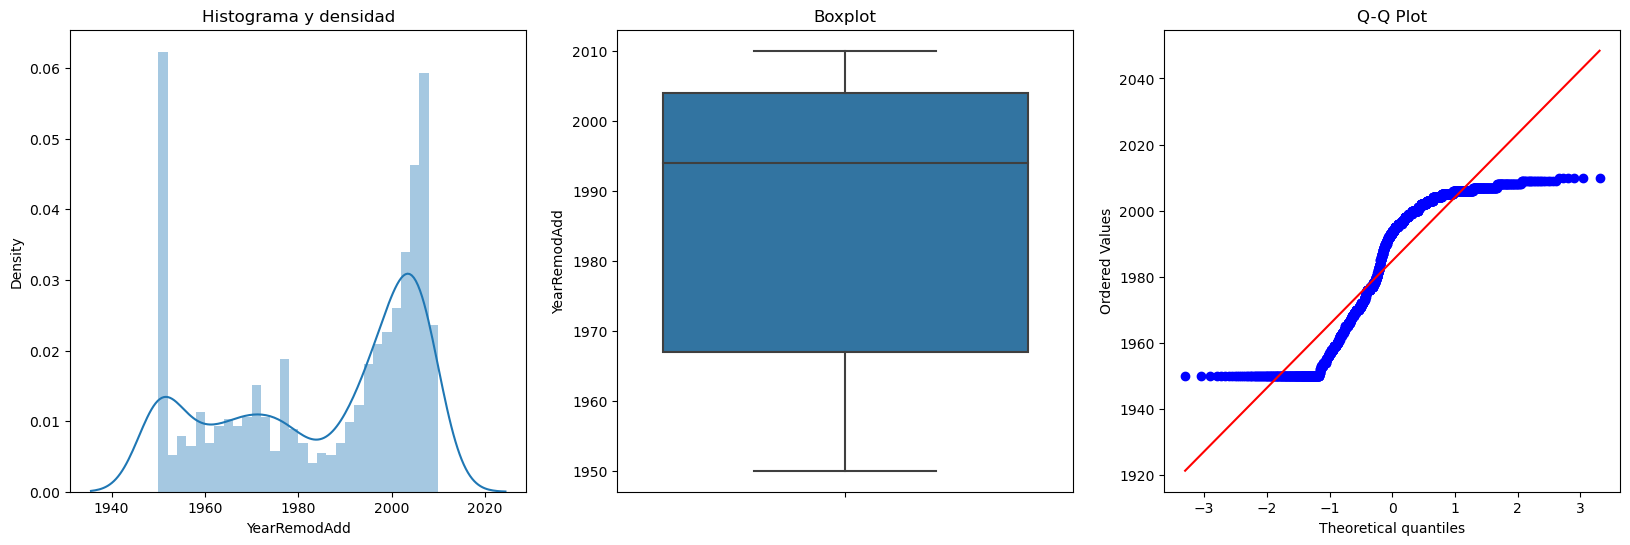

-------MasVnrArea----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


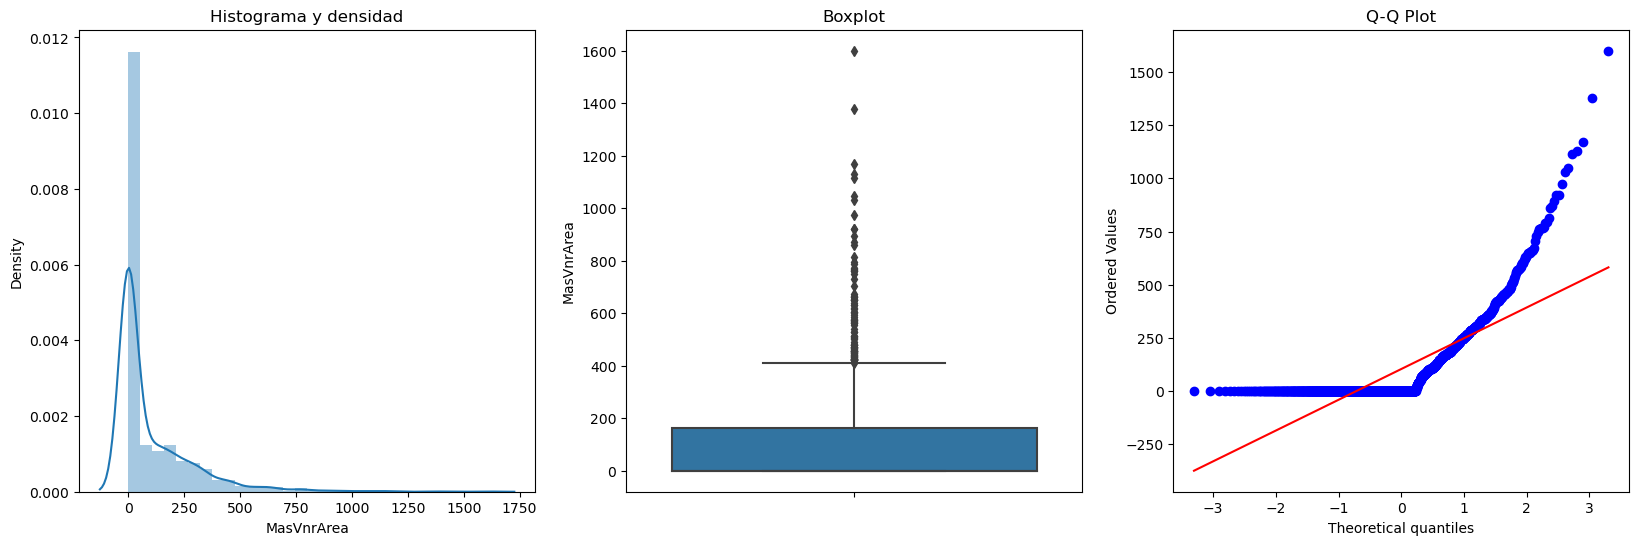

-------BsmtFinSF1----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


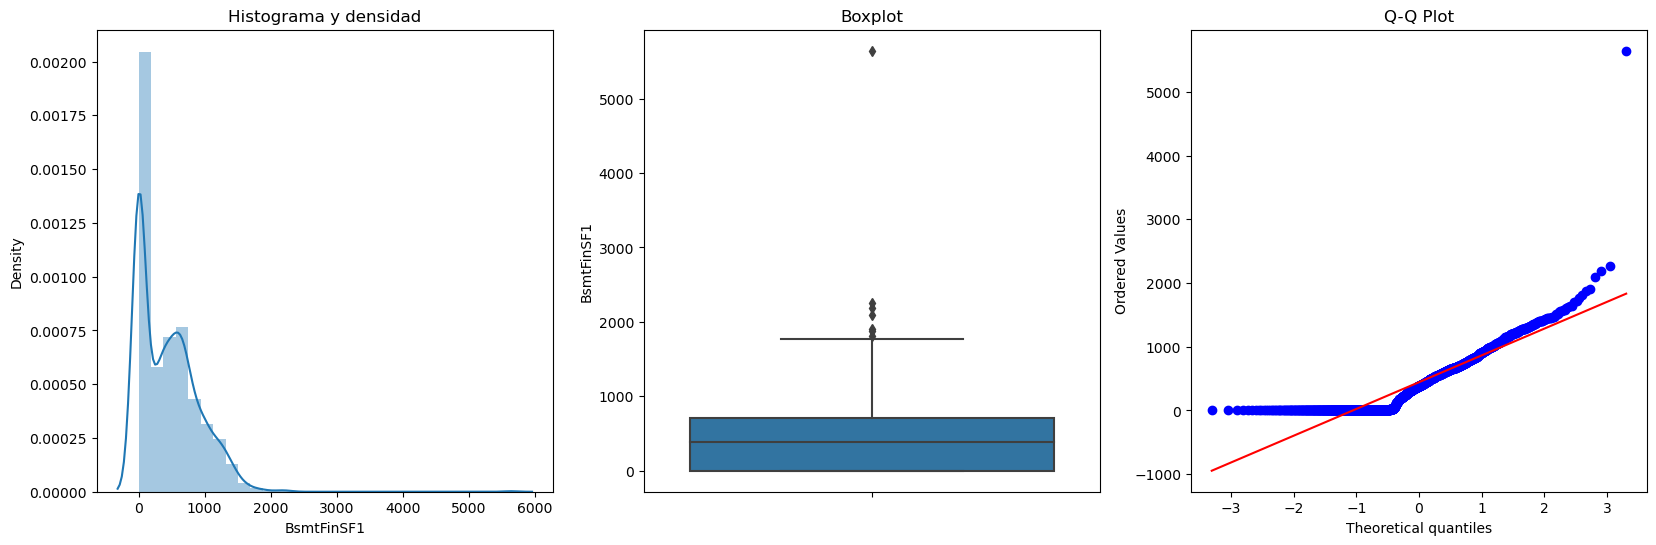

-------BsmtFinSF2----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


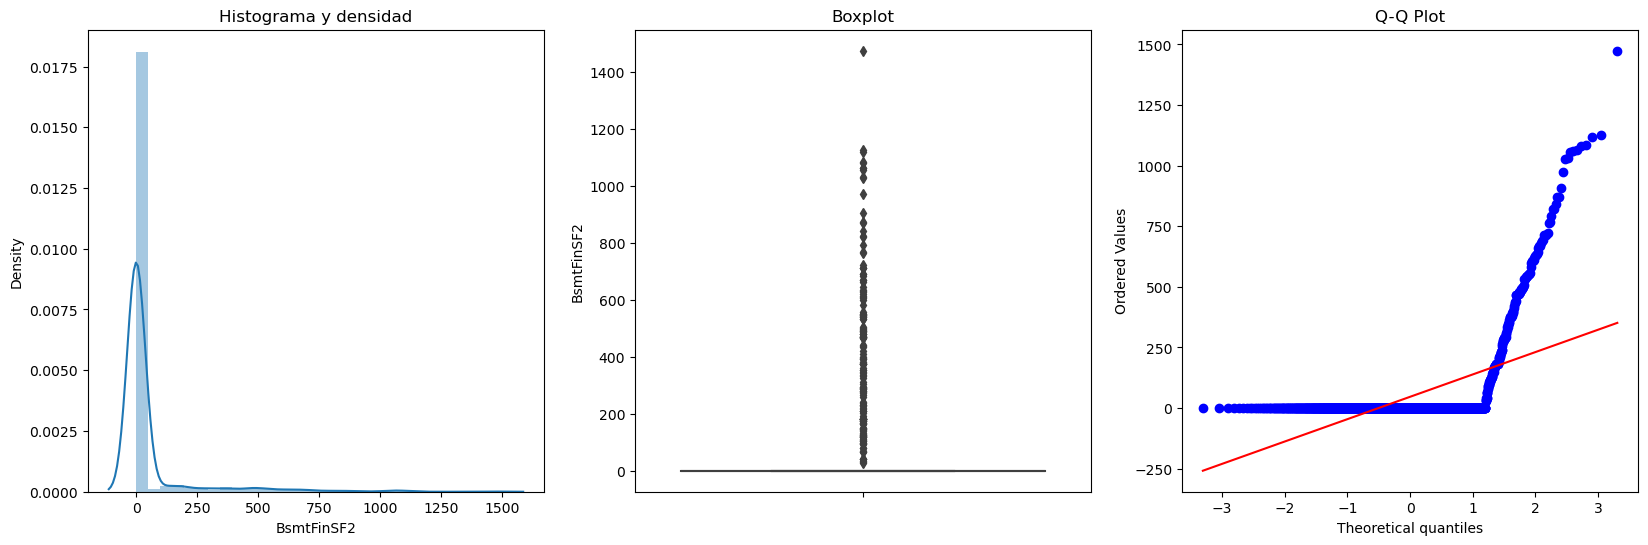

-------BsmtUnfSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


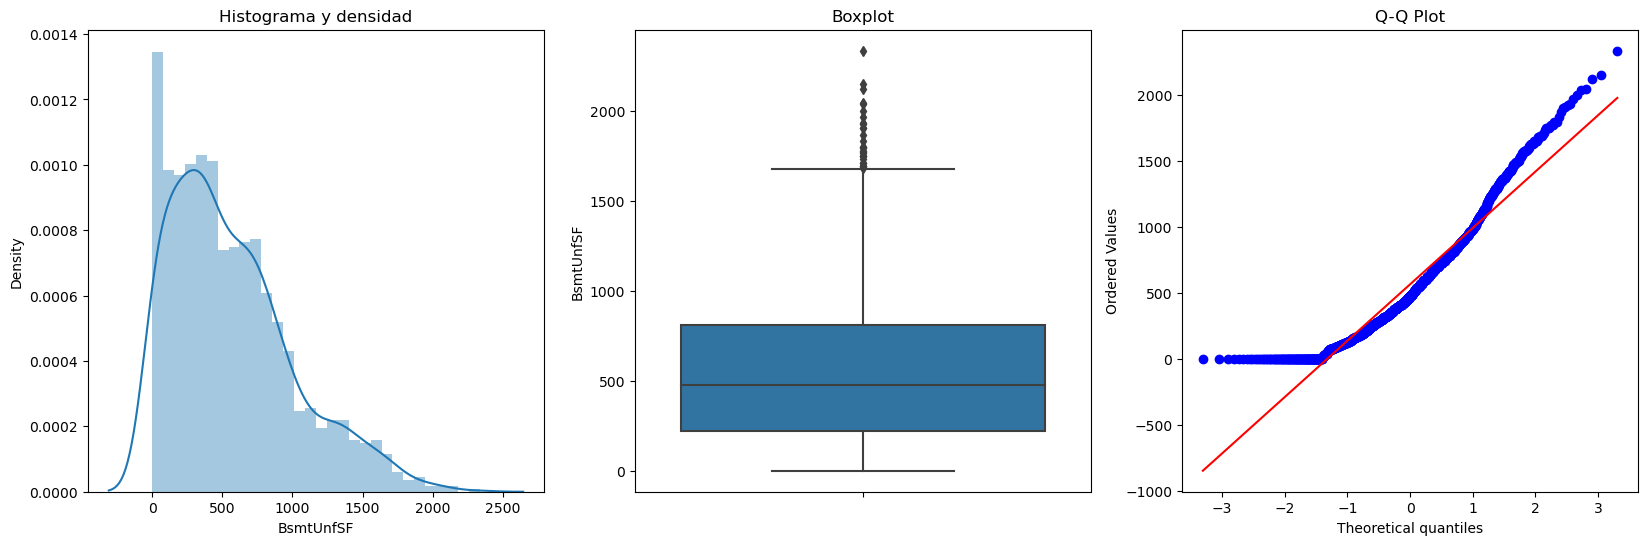

-------TotalBsmtSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


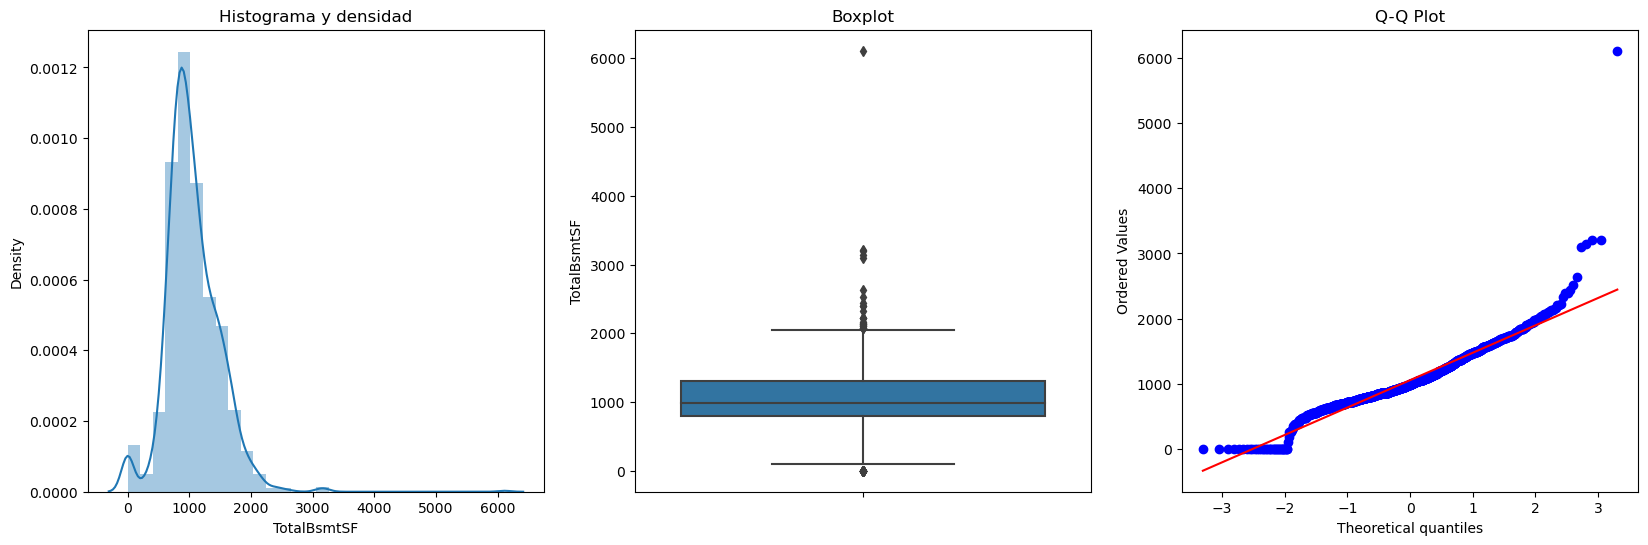

-------1stFlrSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


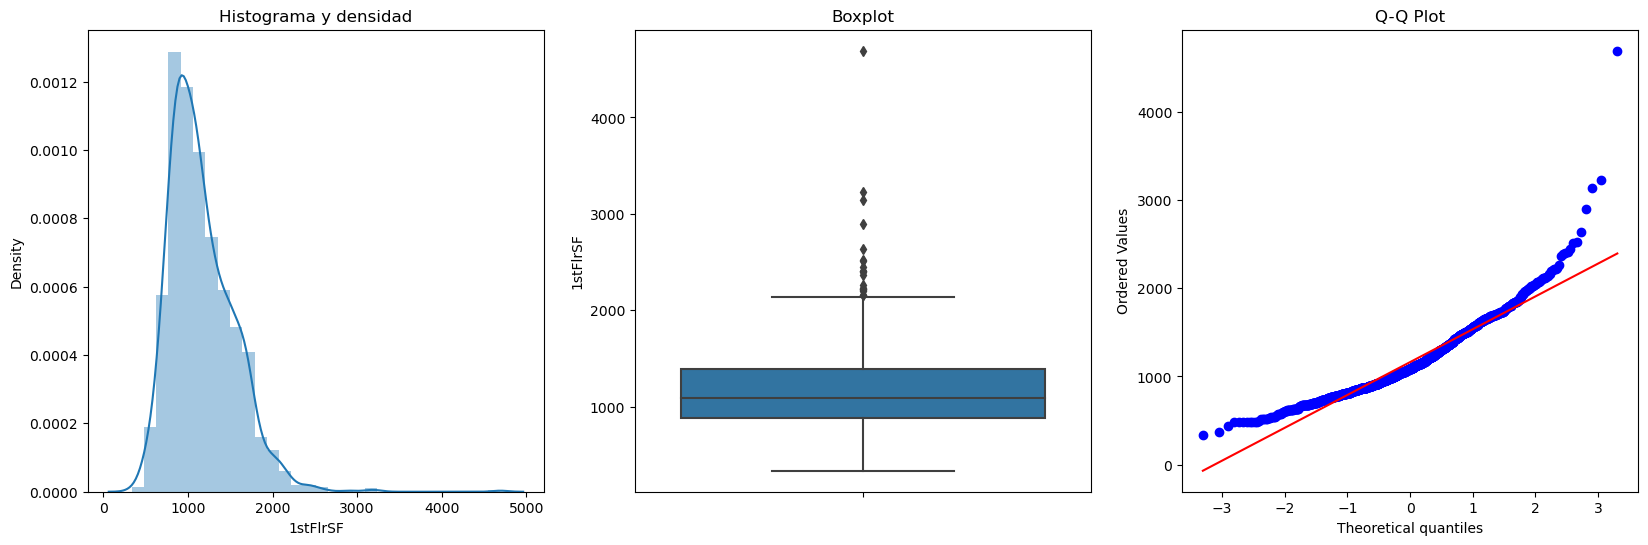

-------2ndFlrSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


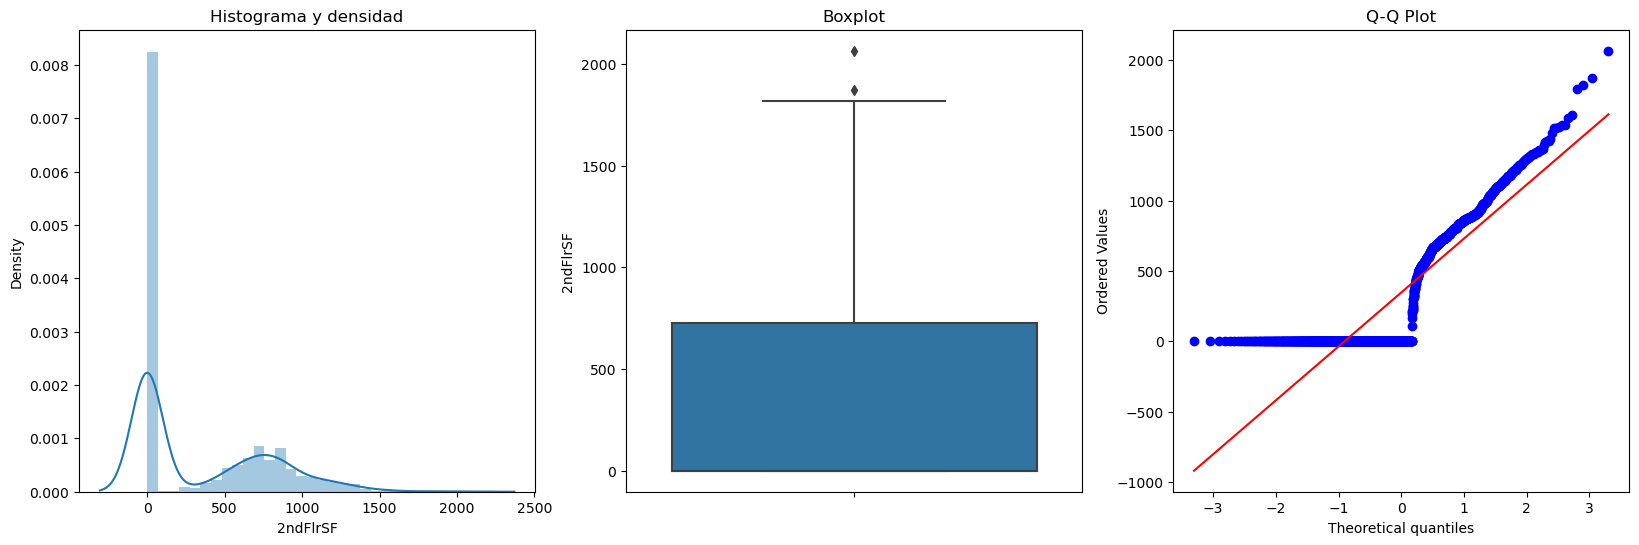

-------GrLivArea----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


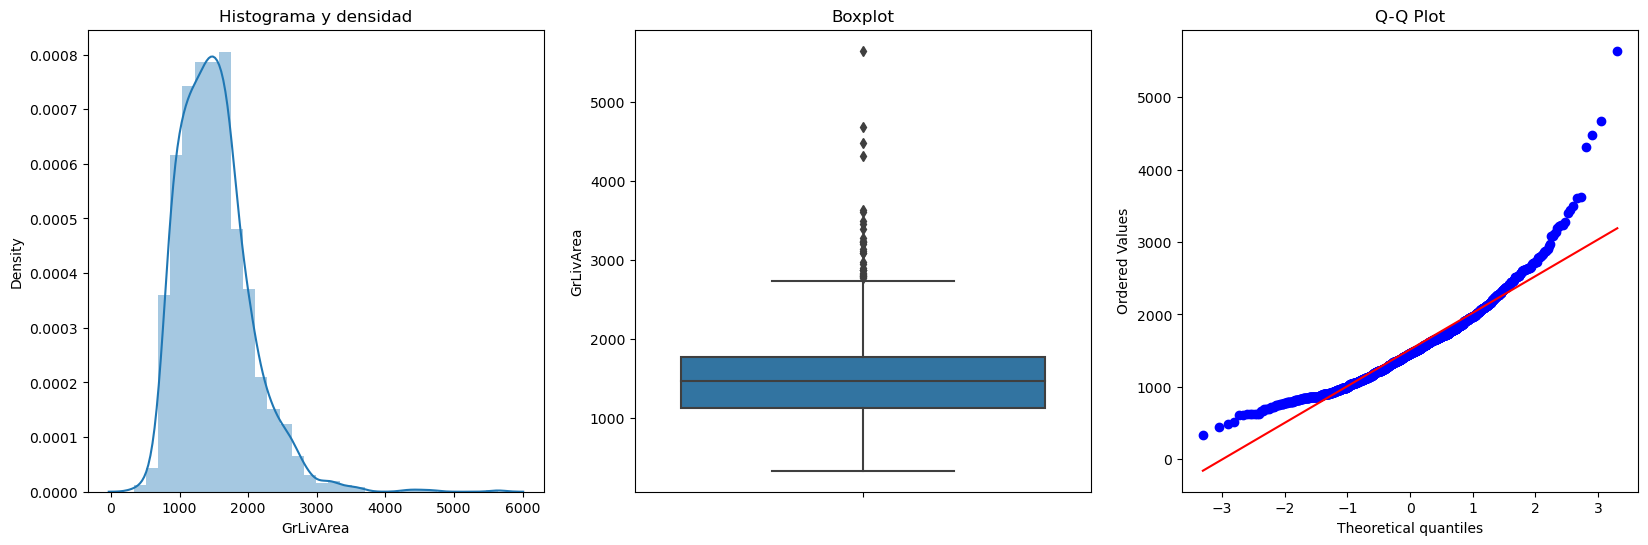

-------GarageYrBlt----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


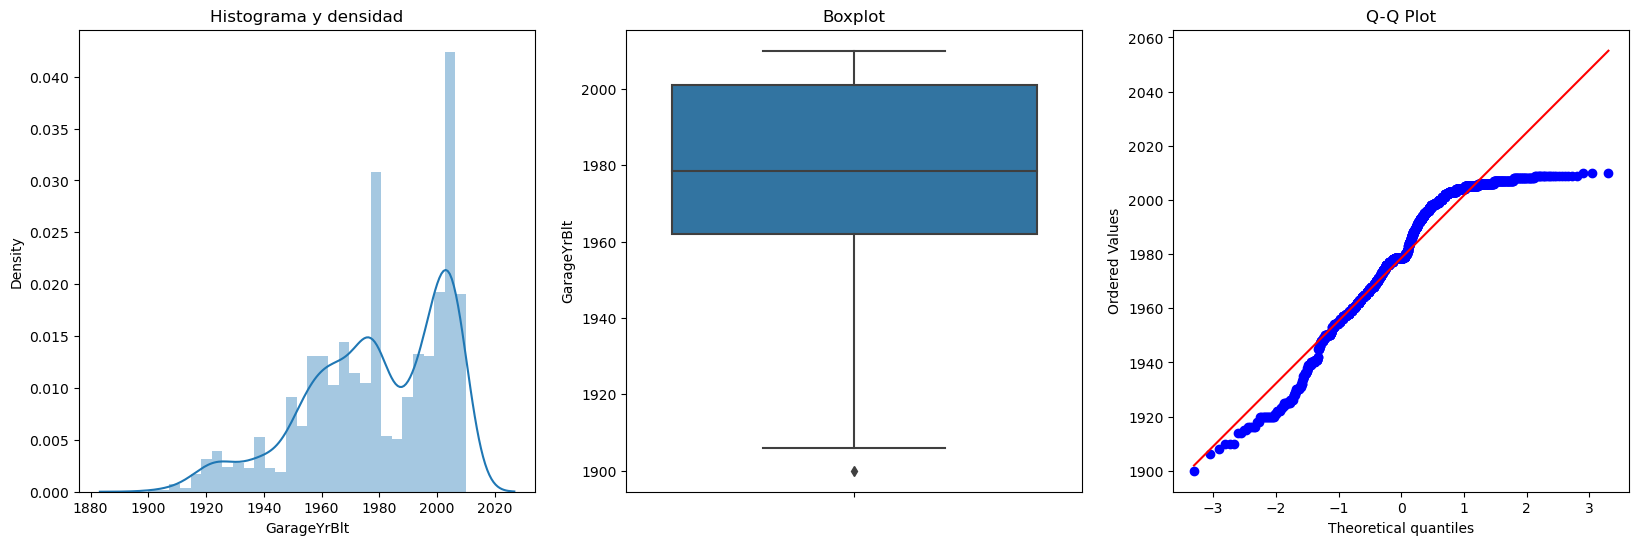

-------GarageArea----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


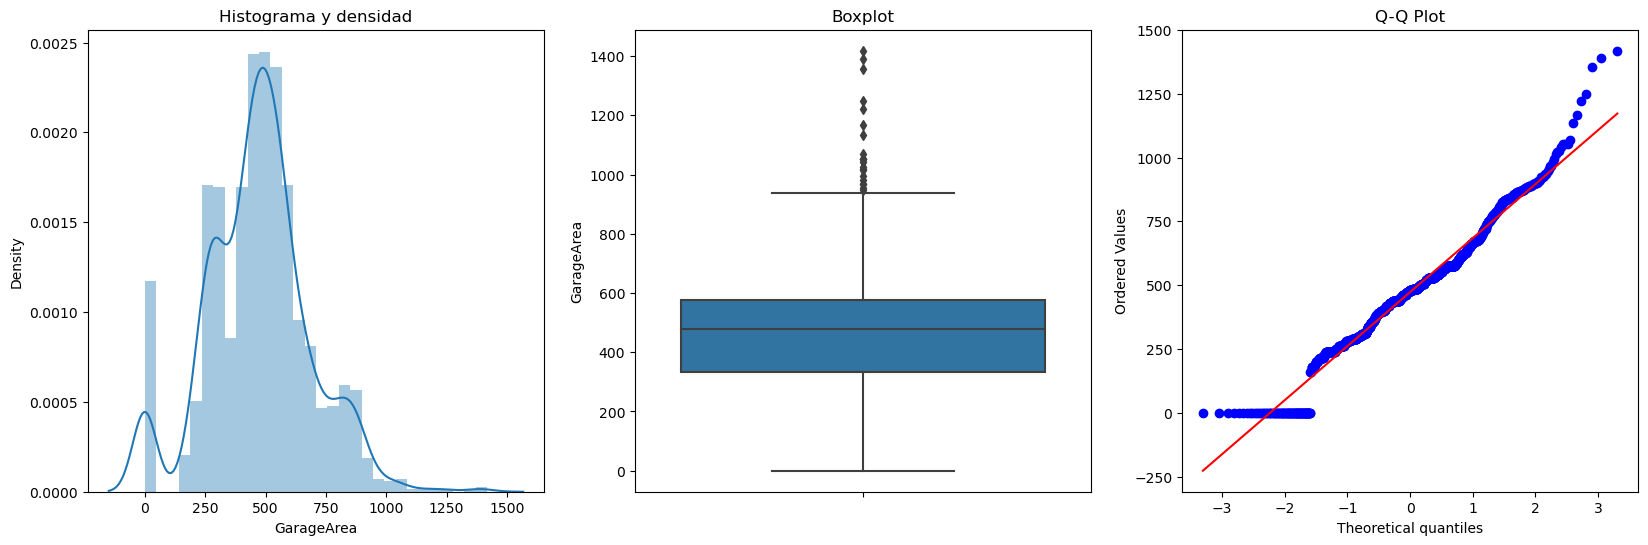

-------WoodDeckSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


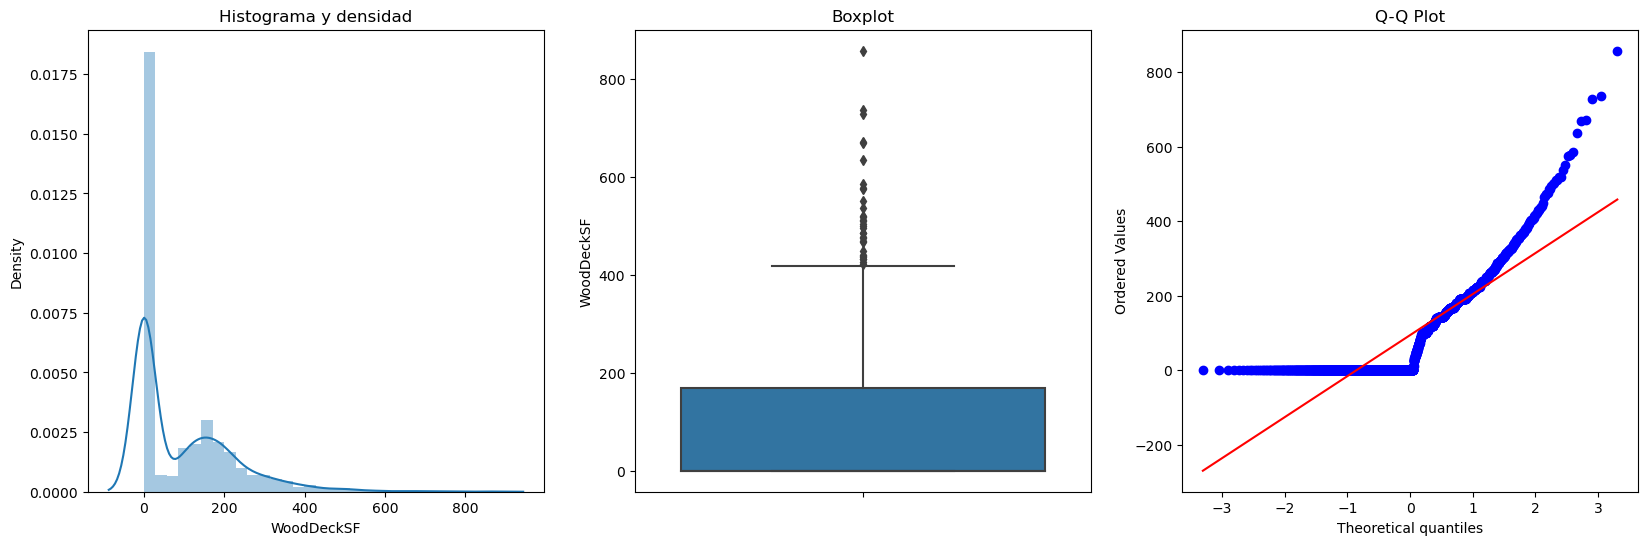

-------OpenPorchSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


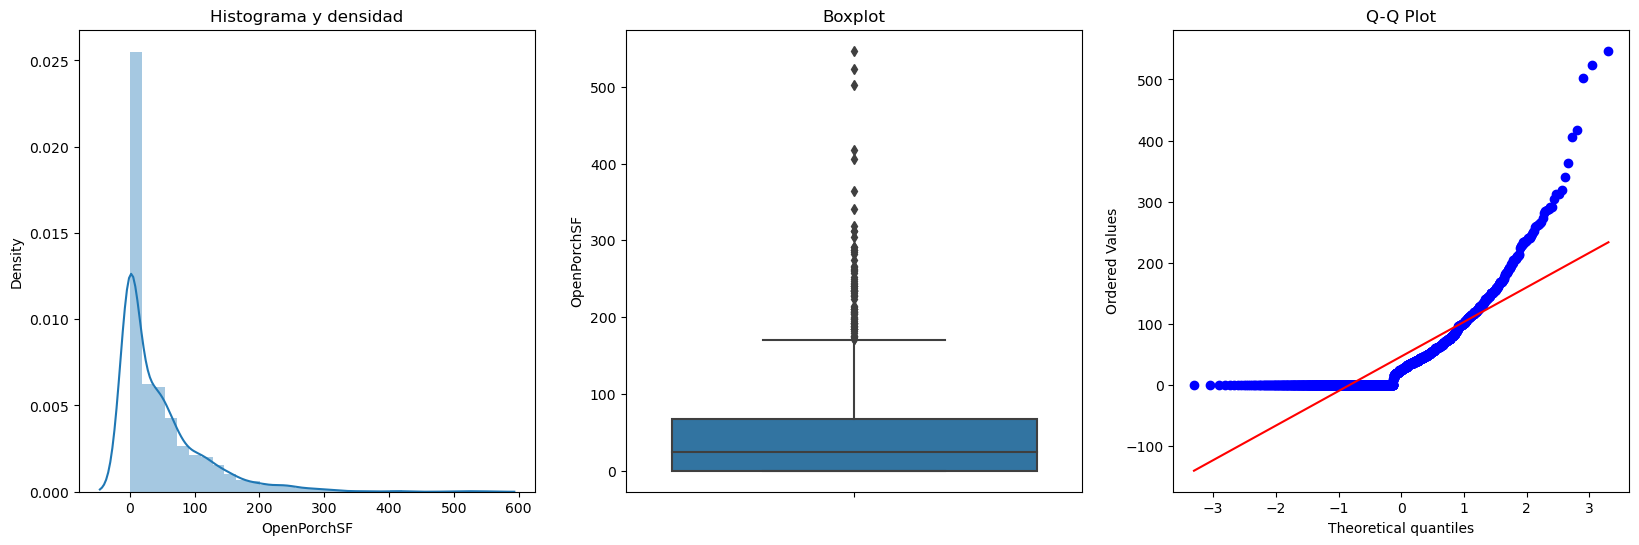

-------EnclosedPorch----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


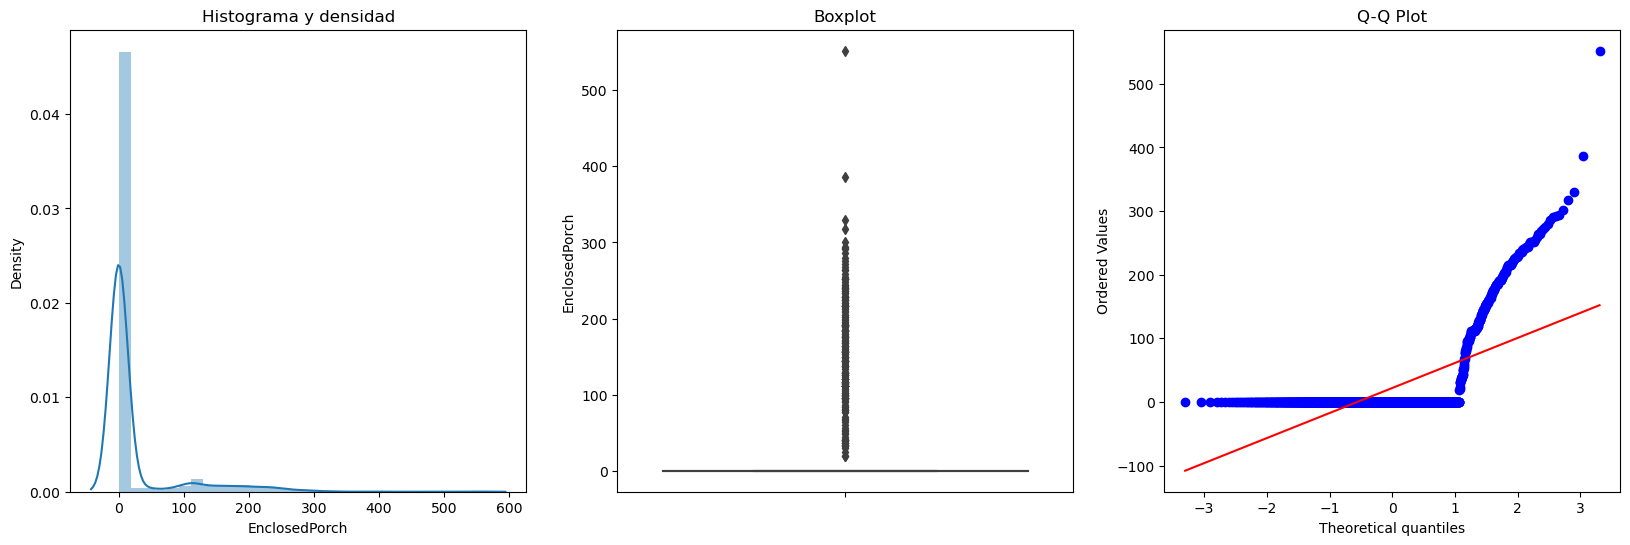

-------ScreenPorch----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


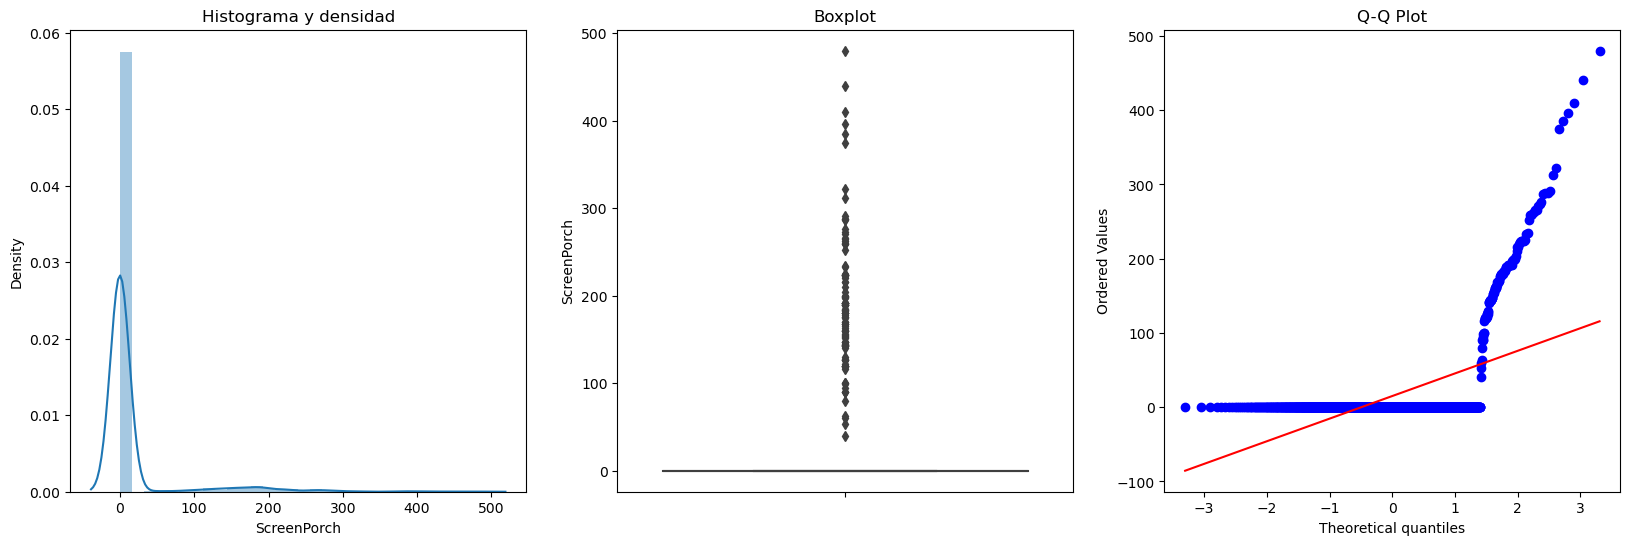

-------SalePrice----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


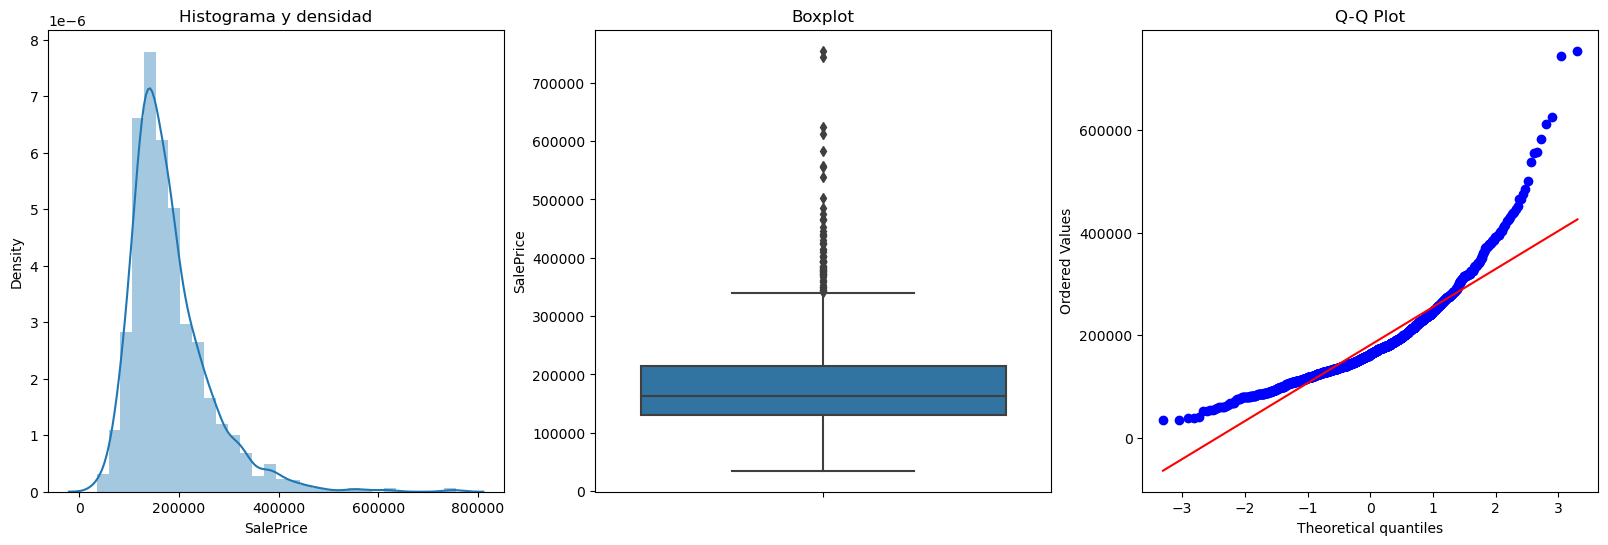

In [351]:
for col in continuas:
    
    print(f"-------{col}----------")
    
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(dataHP[col], bins=30, kde=True)
    plt.title("Histograma y densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataHP[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataHP[col],dist="norm",plot=plt)
    plt.title("Q-Q Plot")
    plt.show()

In [352]:
#eliminamos variables que no aportaran al modelo
col_eliminar = ['Id','EnclosedPorch','ScreenPorch','BsmtFinSF2']
dataHP = dataHP.drop(columns=col_eliminar)
continuas = [col for col in continuas if col not in col_eliminar]


In [353]:
def detectOutlierLimits(dataHP,col):
    '''
    Descripcion: Calcula los limites superiores e inferiores para deteccion de outliers
    Input: dataset -> pandas dataframe, col -> string nombre de columna
    Output: tupla con los limites superior e inferior
    '''

    IQR = dataHP[col].quantile(0.75) - dataHP[col].quantile(0.25)
    LI = dataHP[col].quantile(0.25) - IQR*1.75
    LS = dataHP[col].quantile(0.75) + IQR*1.75

    return LI,LS

### Reemplazamos outliers en variables discretas y continuas

In [354]:
for col in continuas:
    LI,LS=detectOutlierLimits(dataHP,col)
    if LI<0:
        LI=0

    print(f'Columna:{col}, LS:{LS}, LI:{LI}')
    #Reemplazamos los valores que sean mayores o menores al limite superior e inferior, respectivamente
    dataHP[col] = dataHP[col].mask(dataHP[col]>LS,LS)
    dataHP[col] = dataHP[col].mask(dataHP[col]<LI,LI)


Columna:LotFrontage, LS:112.25, LI:26.75
Columna:LotArea, LS:18685.5, LI:469.5
Columna:YearBuilt, LS:2080.5, LI:1873.5
Columna:YearRemodAdd, LS:2068.75, LI:1902.25
Columna:MasVnrArea, LS:451.6875, LI:0
Columna:BsmtFinSF1, LS:1958.6875, LI:0
Columna:BsmtUnfSF, LS:1831.75, LI:0
Columna:TotalBsmtSF, LS:2177.625, LI:0
Columna:1stFlrSF, LS:2282.4375, LI:0
Columna:2ndFlrSF, LS:2002.0, LI:0
Columna:GrLivArea, LS:2909.4375, LI:0
Columna:GarageYrBlt, LS:2069.25, LI:1893.75
Columna:GarageArea, LS:998.625, LI:0
Columna:WoodDeckSF, LS:462.0, LI:0
Columna:OpenPorchSF, LS:187.0, LI:0
Columna:SalePrice, LS:361043.75, LI:0


In [355]:
for col in discretas:
    LI,LS=detectOutlierLimits(dataHP,col)
    if LI<0:
        LI=0
    
    print(f'Columna:{col}, LS:{LS}, LI:{LI}')    
    #Reemplazamos los valores que sean mayores o menores al limite superior e inferior, respectivamente
    dataHP[col] = dataHP[col].mask(dataHP[col]>LS,LS)
    dataHP[col] = dataHP[col].mask(dataHP[col]<LI,LI)


Columna:MSSubClass, LS:157.5, LI:0
Columna:OverallQual, LS:10.5, LI:1.5
Columna:OverallCond, LS:7.75, LI:3.25
Columna:LowQualFinSF, LS:0.0, LI:0.0
Columna:BsmtFullBath, LS:2.75, LI:0
Columna:BsmtHalfBath, LS:0.0, LI:0.0
Columna:FullBath, LS:3.75, LI:0
Columna:HalfBath, LS:2.75, LI:0
Columna:BedroomAbvGr, LS:4.75, LI:0.25
Columna:KitchenAbvGr, LS:1.0, LI:1.0
Columna:TotRmsAbvGrd, LS:10.5, LI:1.5
Columna:Fireplaces, LS:2.75, LI:0
Columna:GarageCars, LS:3.75, LI:0
Columna:3SsnPorch, LS:0.0, LI:0.0
Columna:PoolArea, LS:0.0, LI:0.0
Columna:MiscVal, LS:0.0, LI:0.0
Columna:MoSold, LS:13.25, LI:0
Columna:YrSold, LS:2012.5, LI:2003.5
Columna:MSZoning_code, LS:1151.0, LI:1151.0
Columna:Street_code, LS:1454.0, LI:1454.0
Columna:LotShape_code, LS:1696.75, LI:0
Columna:LandContour_code, LS:1311.0, LI:1311.0
Columna:Utilities_code, LS:1459.0, LI:1459.0
Columna:LotConfig_code, LS:2432.75, LI:0
Columna:LandSlope_code, LS:1382.0, LI:1382.0
Columna:Neighborhood_code, LS:323.25, LI:0
Columna:Condition1_c

-------LotFrontage----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


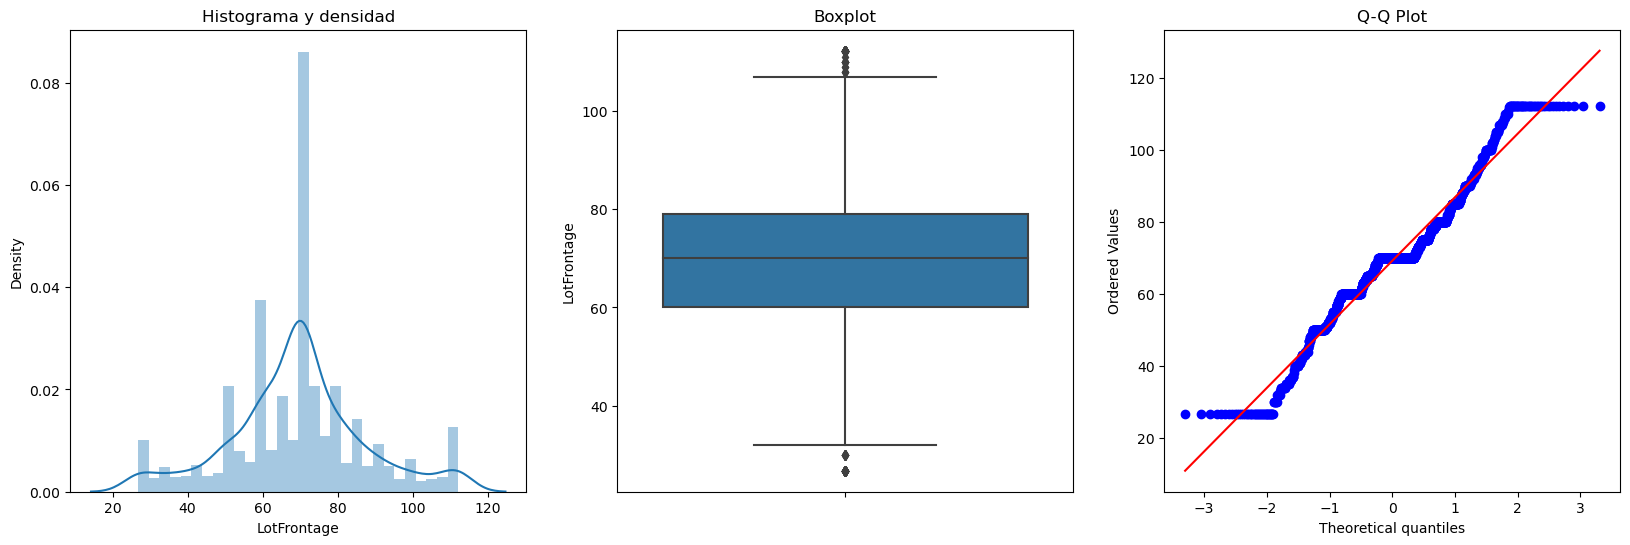

-------LotArea----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


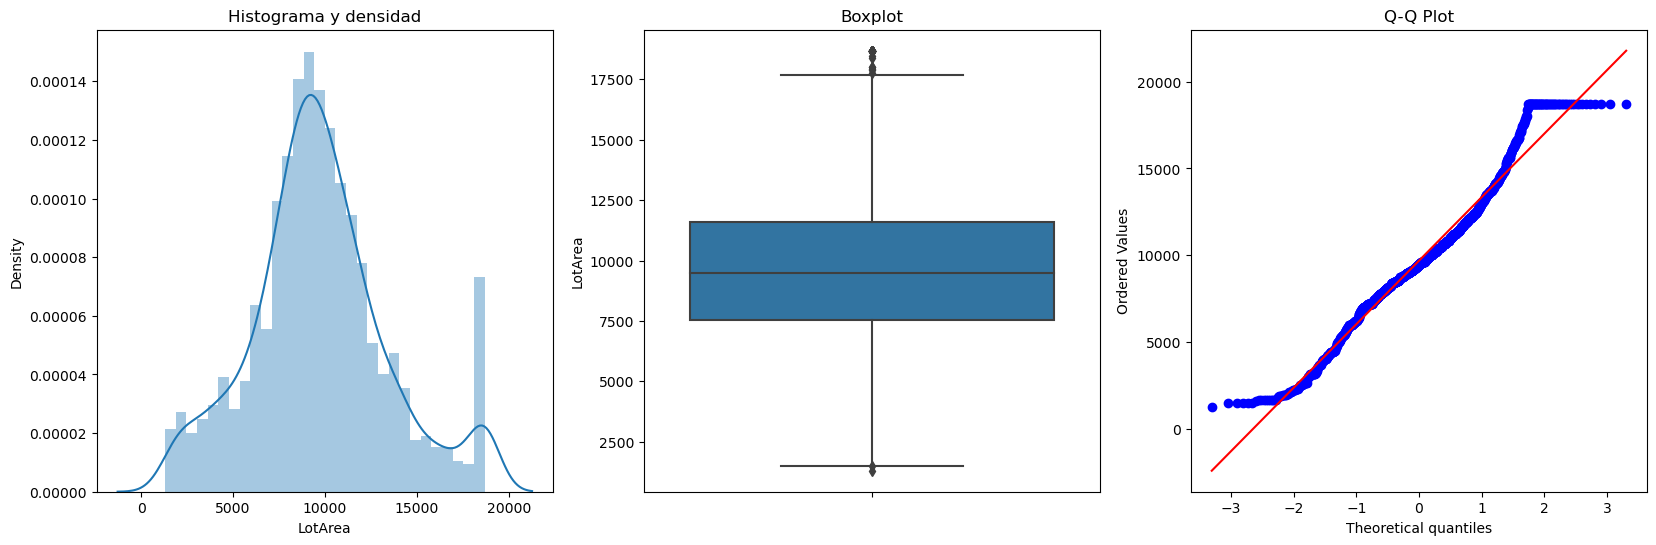

-------YearBuilt----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


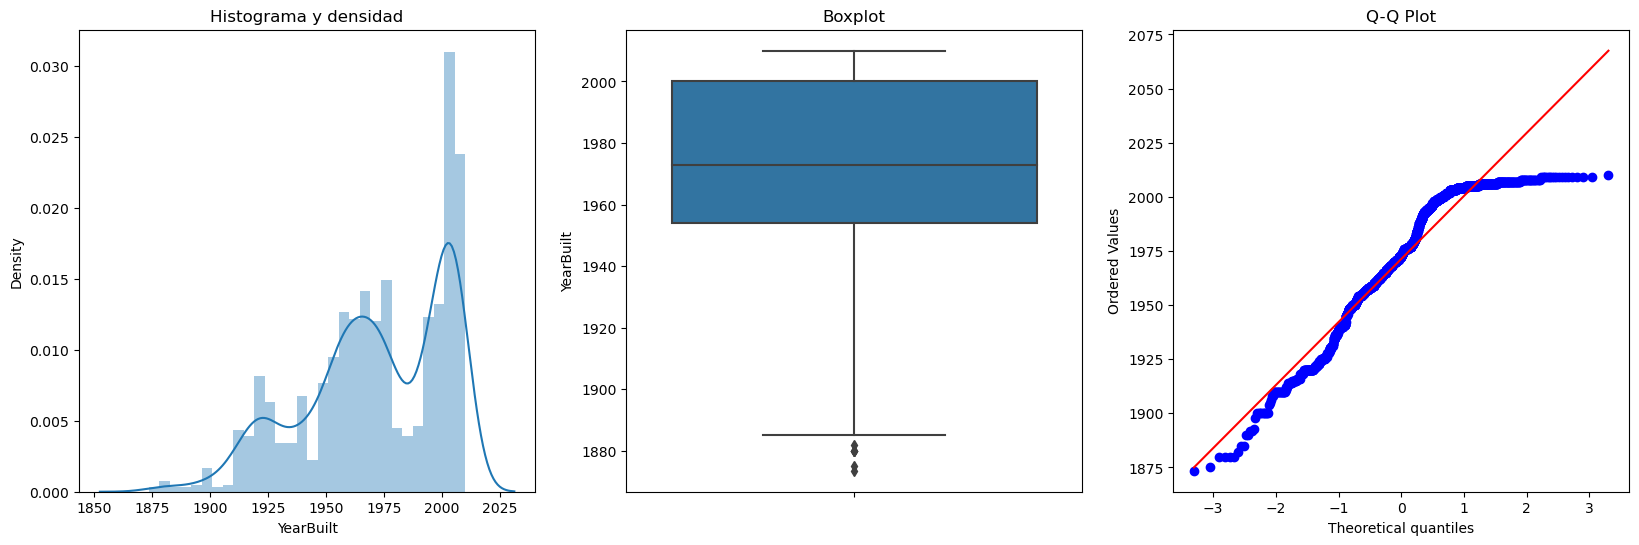

-------YearRemodAdd----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


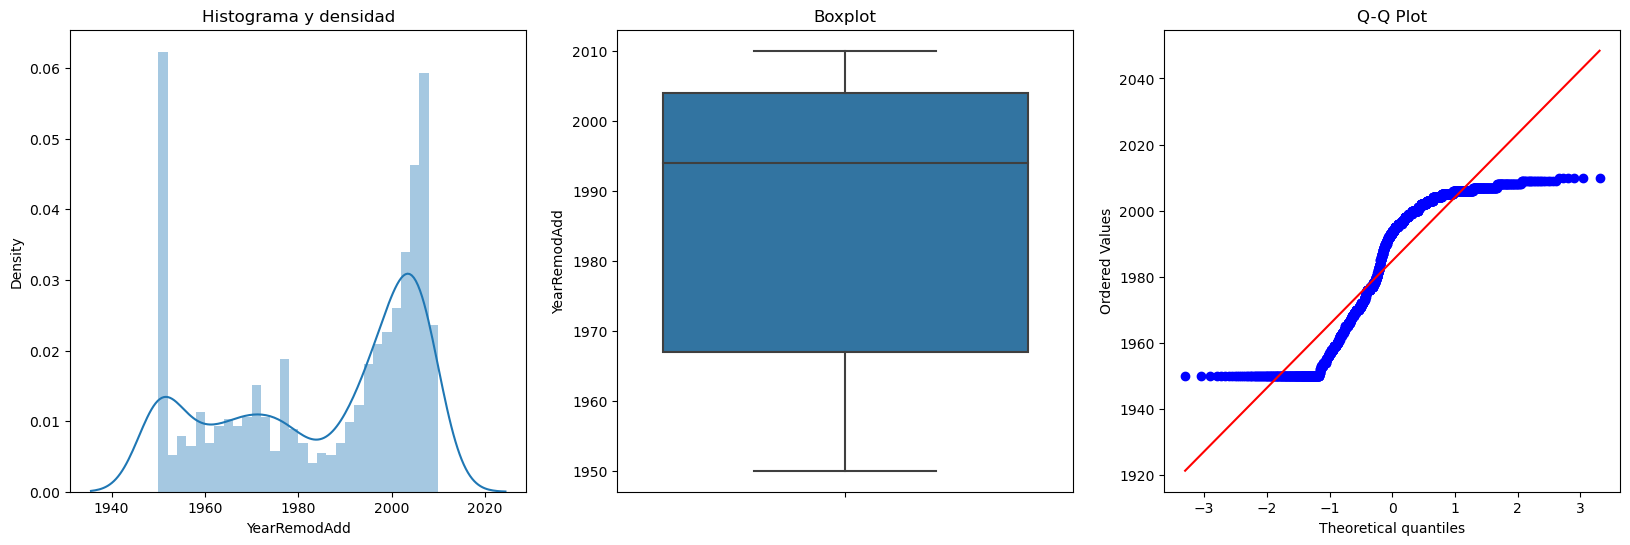

-------MasVnrArea----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


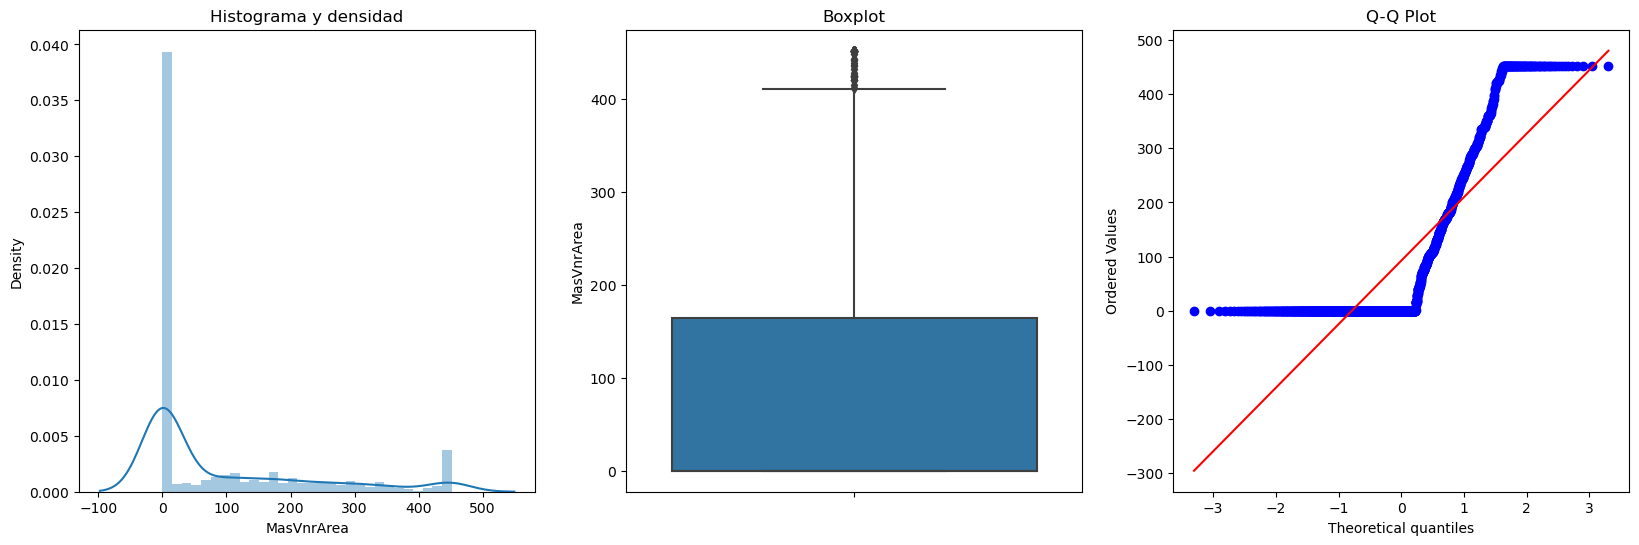

-------BsmtFinSF1----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


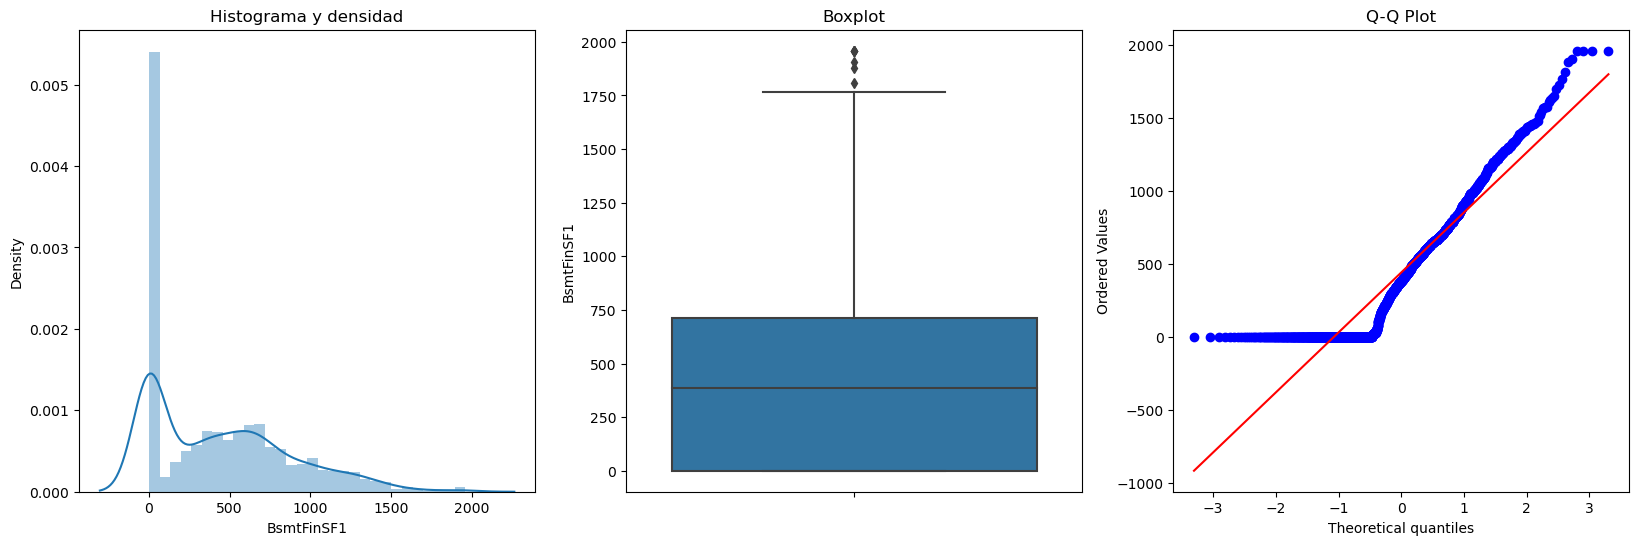

-------BsmtUnfSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


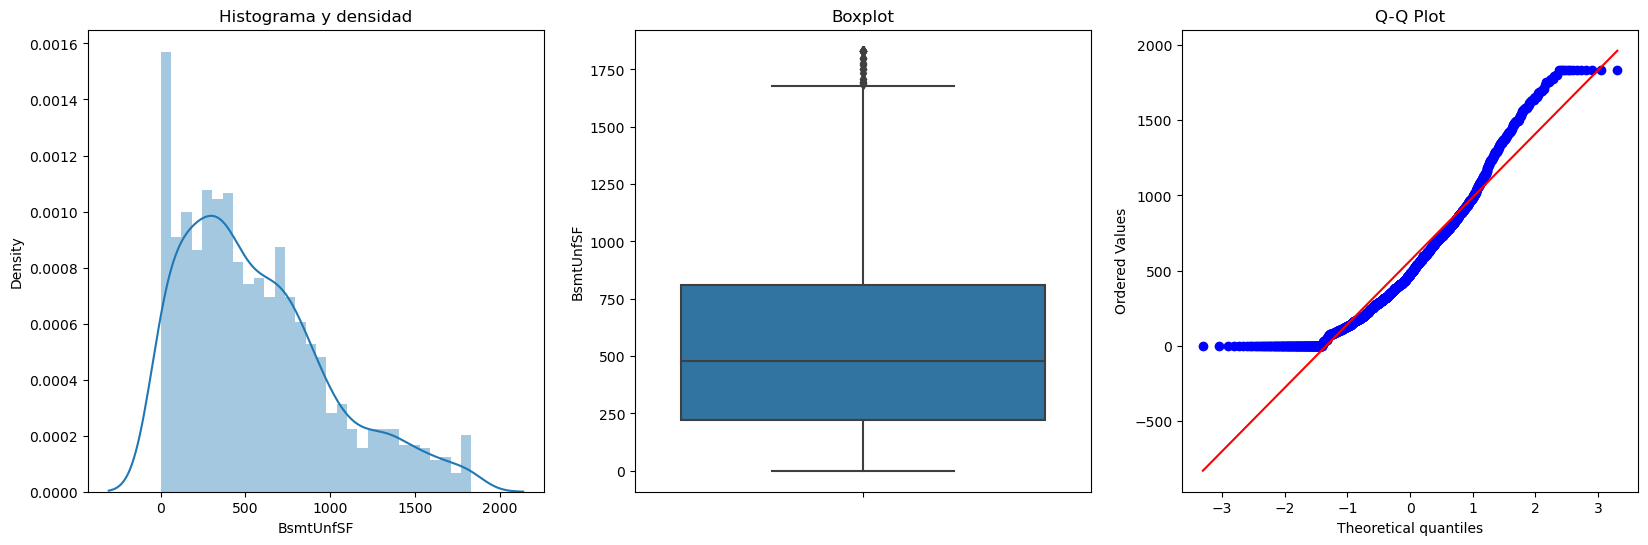

-------TotalBsmtSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


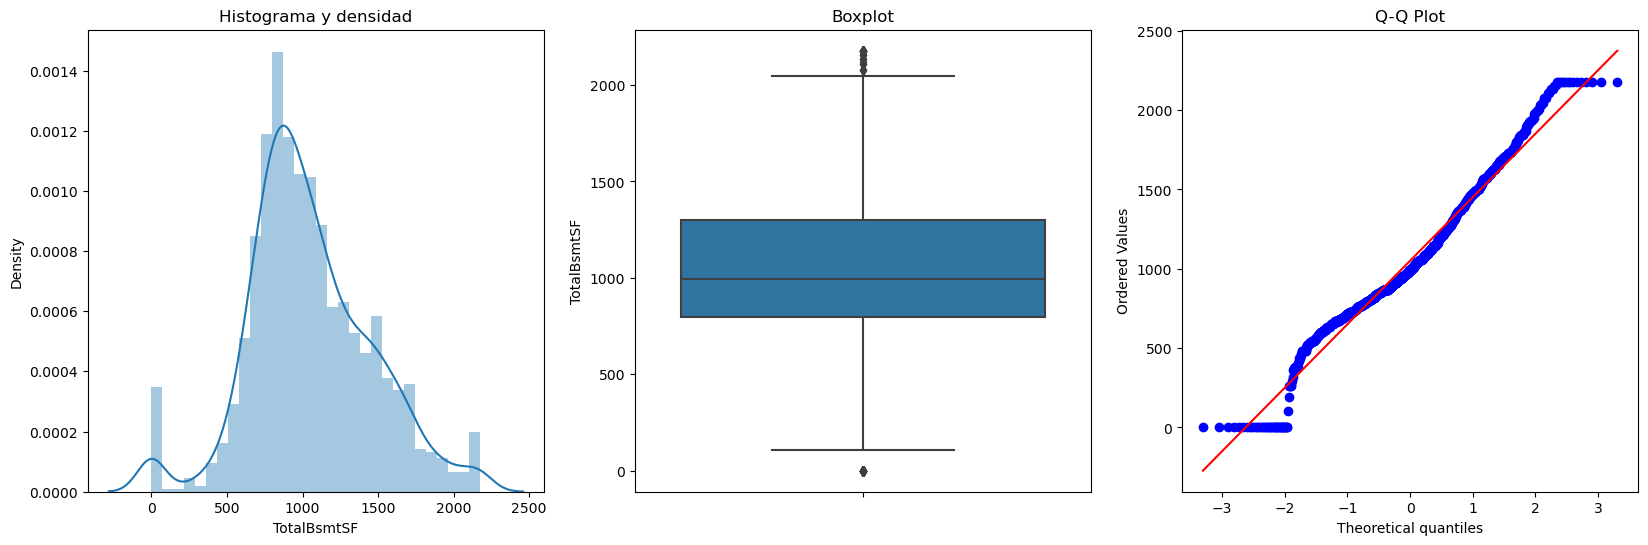

-------1stFlrSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


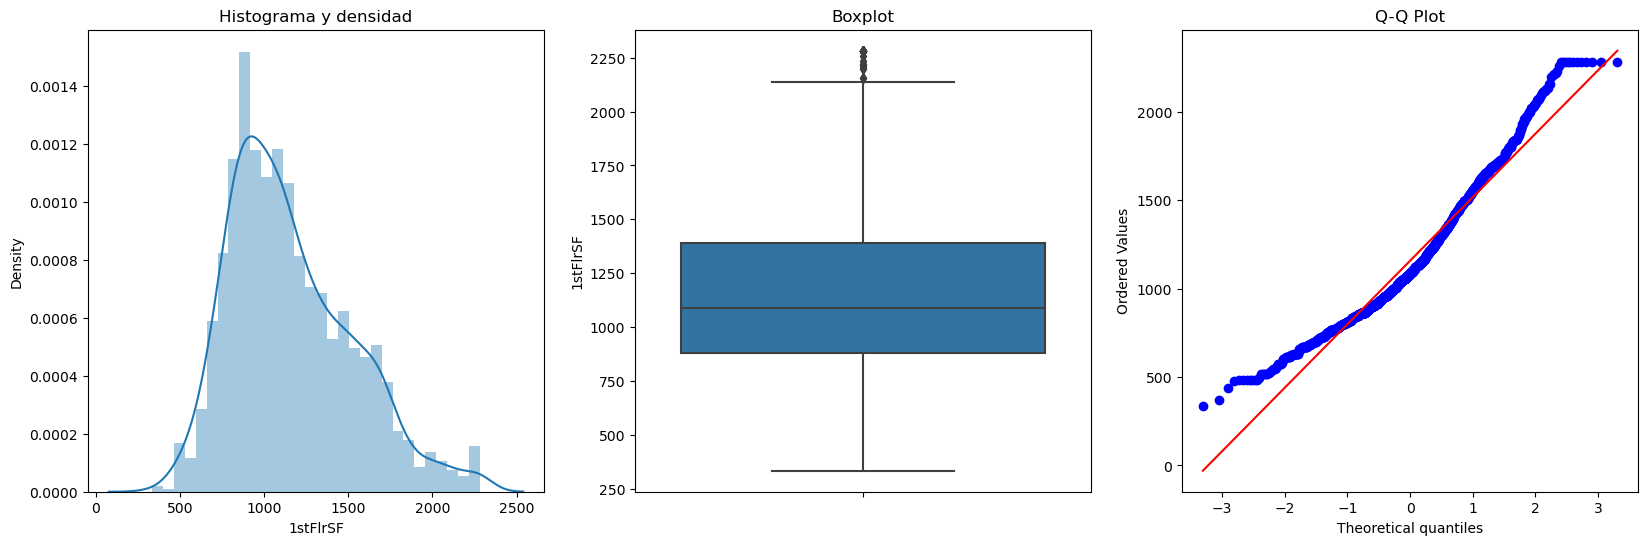

-------2ndFlrSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


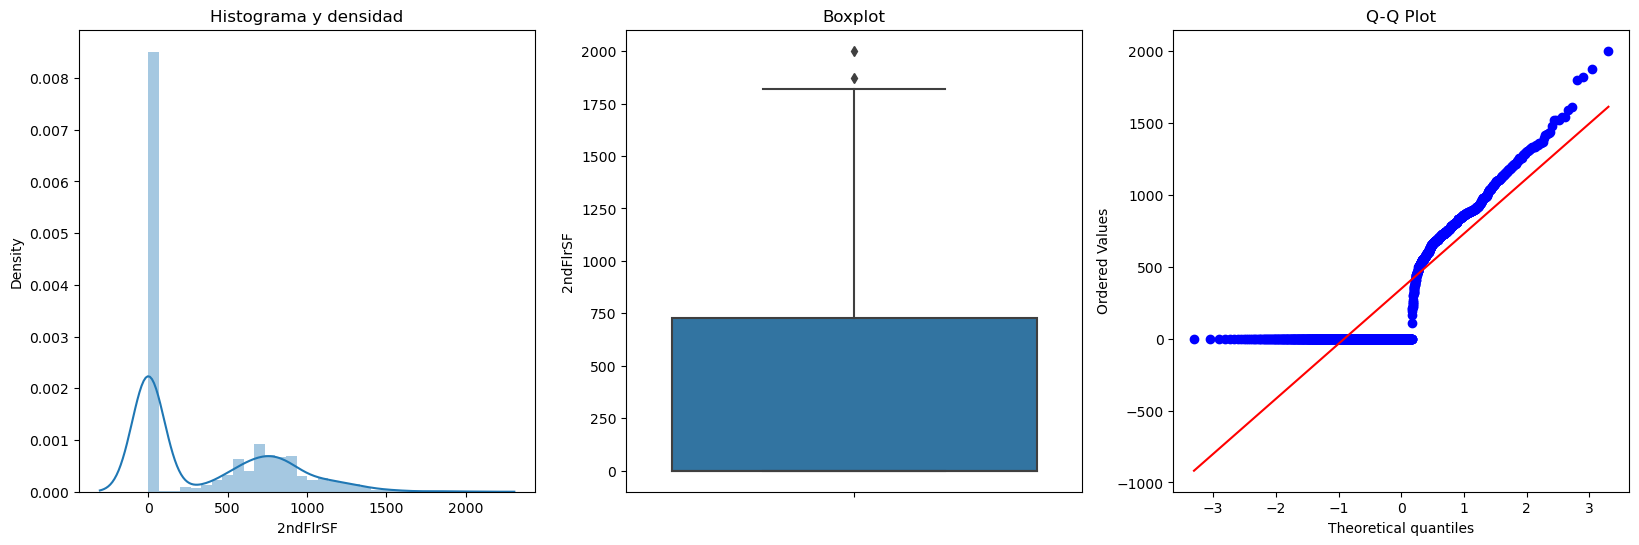

-------GrLivArea----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


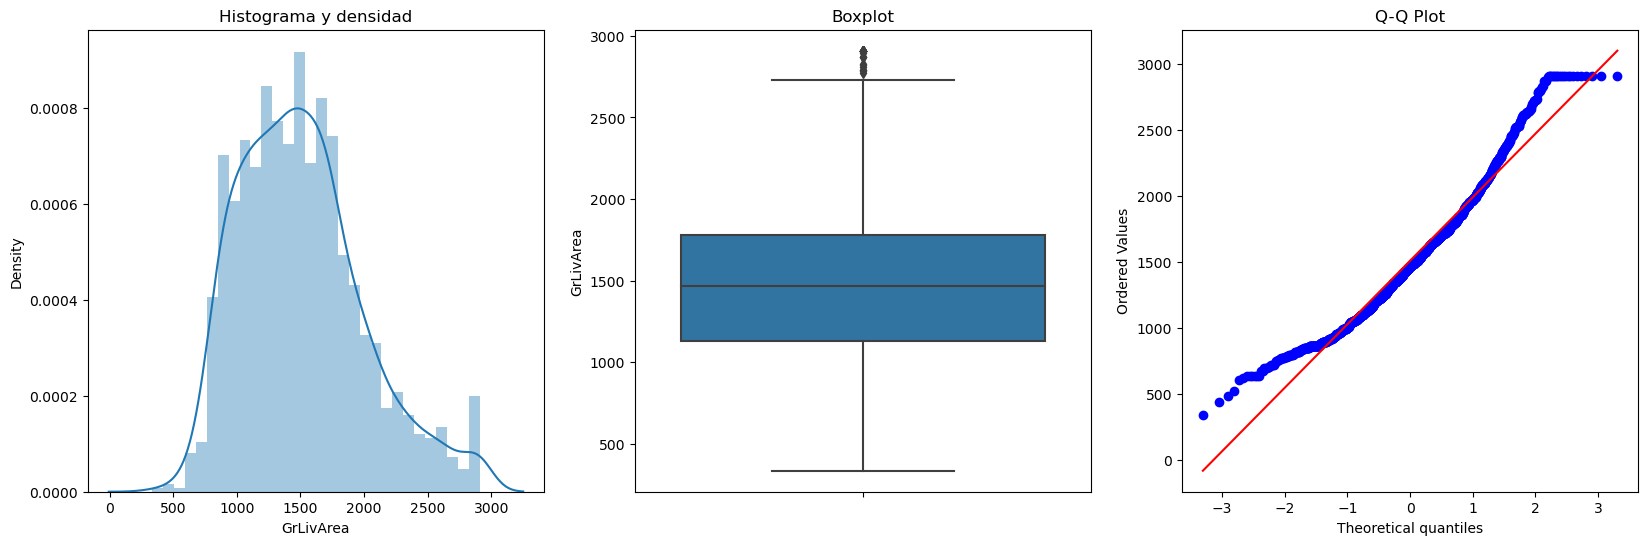

-------GarageYrBlt----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


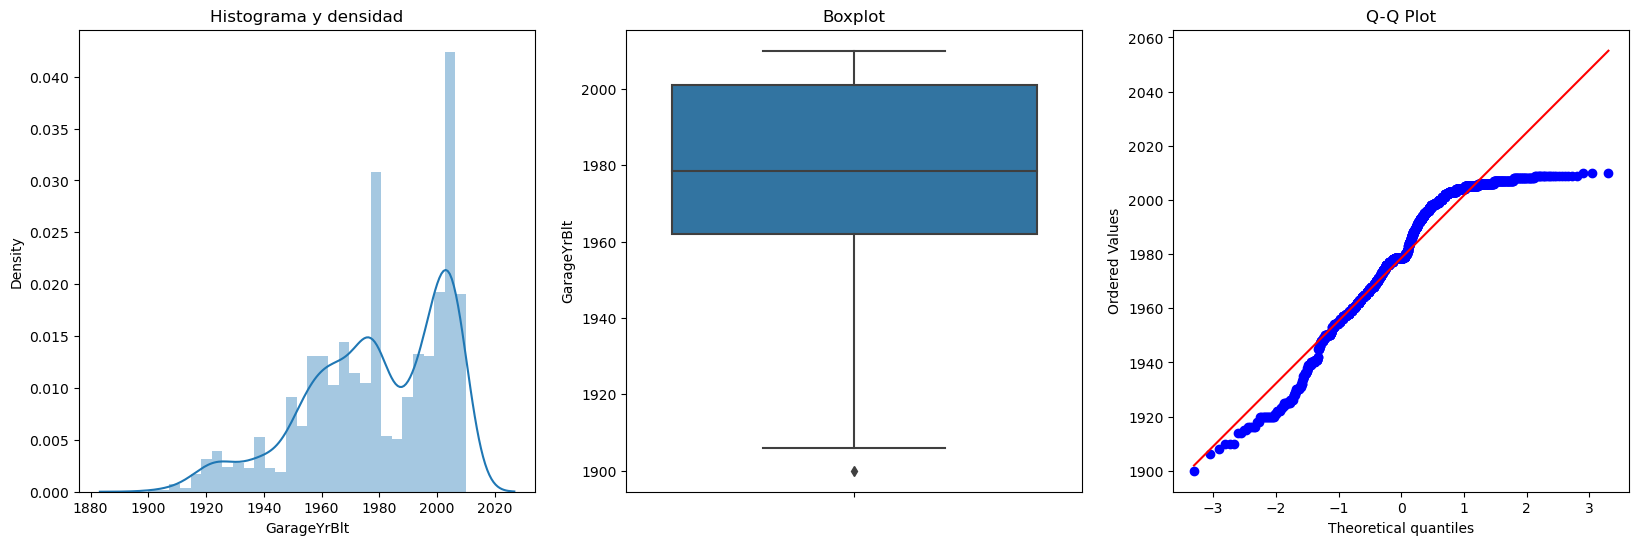

-------GarageArea----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


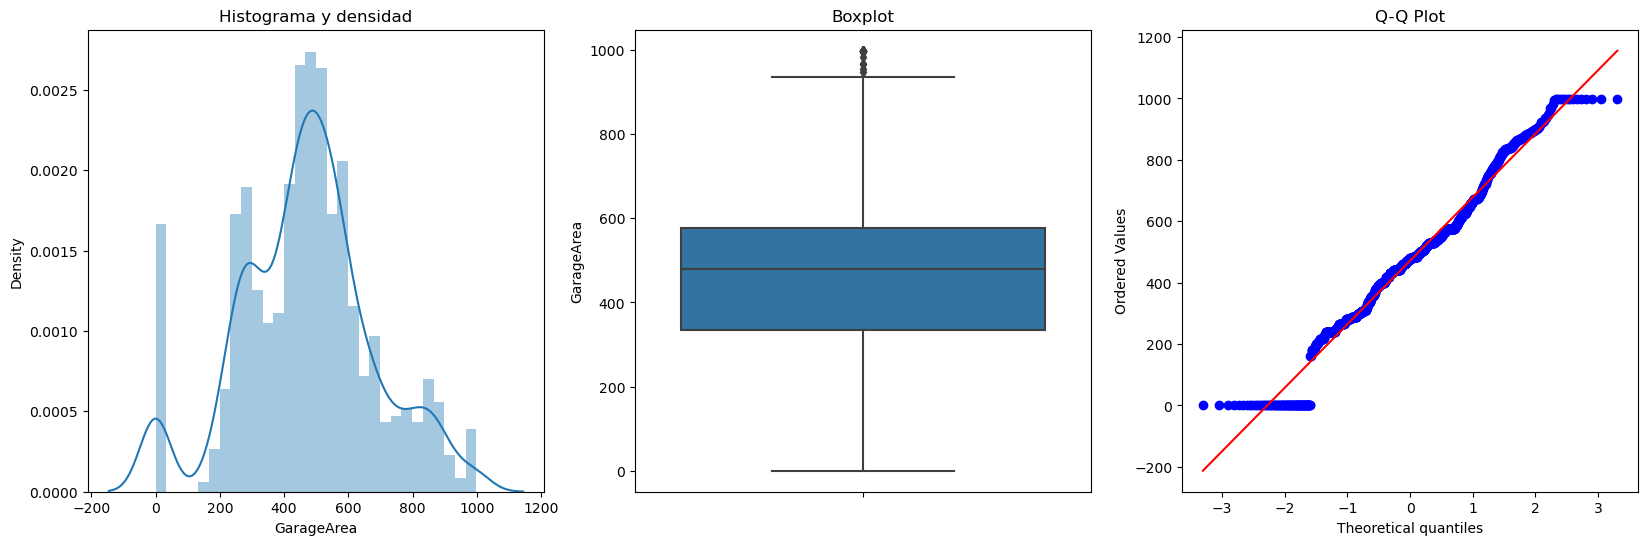

-------WoodDeckSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


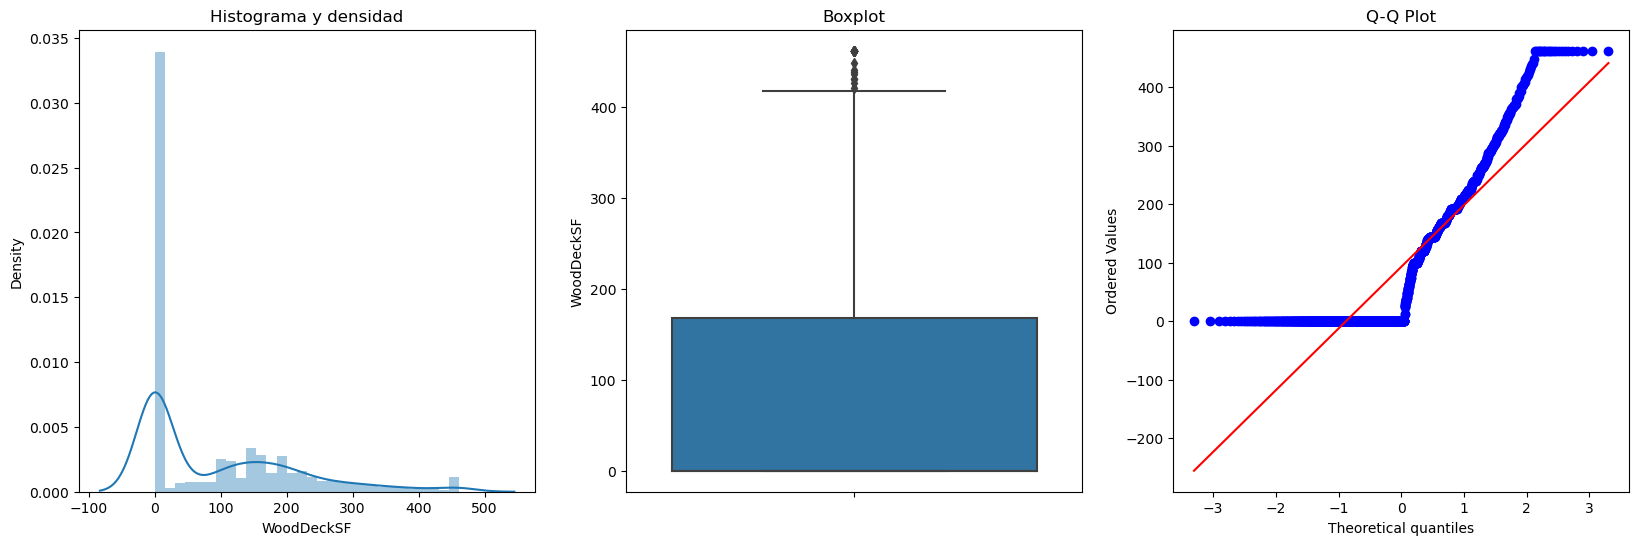

-------OpenPorchSF----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


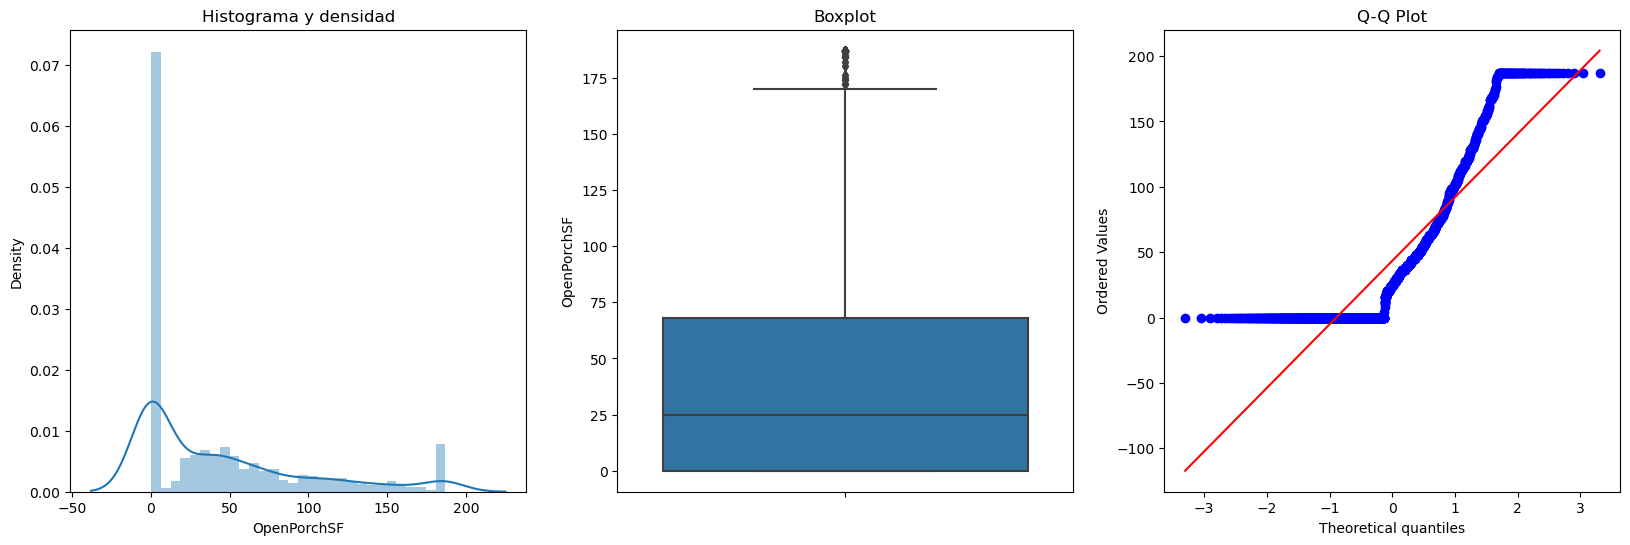

-------SalePrice----------


c:\Users\pablo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


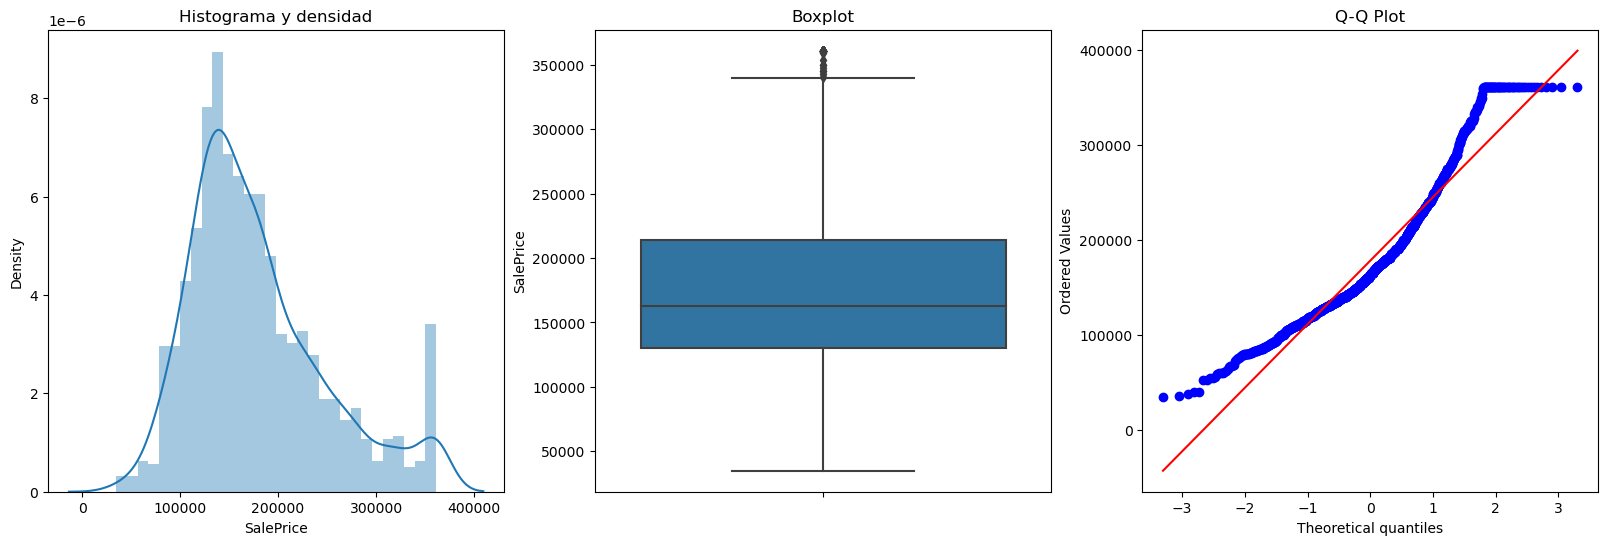

In [356]:
#Volvemos a correr las graficas para comprobar los cambios y observamos que las Boxplot han mejorado considerablemente.
for col in continuas:
    
    print(f"-------{col}----------")
    
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(dataHP[col], bins=30, kde=True)
    plt.title("Histograma y densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataHP[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataHP[col],dist="norm",plot=plt)
    plt.title("Q-Q Plot")
    plt.show()


### Normalizacion de datos

In [357]:
from sklearn.preprocessing import power_transform

In [358]:
type(dataHP)

pandas.core.frame.DataFrame

In [359]:
# aplicamos transformacion yeo-johnson para normalizar nuestros datos
# busca generar la curva y que no haya tanta diferencia de rangos entre variables
dataHP_norm = power_transform(dataHP, method='yeo-johnson')
dataHP = pd.DataFrame(dataHP_norm, columns=dataHP.columns)
dataHP

c:\Users\pablo\anaconda3\lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.493894    -0.235013 -0.290236     0.671797    -0.490420   1.151861   
1      -1.164882     0.599044  0.022347    -0.036659     1.918674   0.006732   
2       0.493894    -0.067711  0.456188     0.671797    -0.490420   1.055359   
3       0.703876    -0.514451  0.008943     0.671797    -0.490420  -1.629674   
4       0.493894     0.820496  1.211864     1.348558    -0.490420   1.007866   
...          ...          ...       ...          ...          ...        ...   
1455    0.493894    -0.402583 -0.438403    -0.036659    -0.490420   0.960872   
1456   -1.164882     0.875802  0.944166    -0.036659     0.532901   0.080749   
1457    0.703876    -0.179217 -0.128175     0.671797     1.918674  -1.061381   
1458   -1.164882    -0.067711  0.053648    -0.783199     0.532901  -0.823998   
1459   -1.164882     0.321684  0.112271    -0.783199     0.532901  -0.373224   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  ...  Electrical_code  \
0         0.908055    1.225510    0.799679  -0.891141  ...              0.0   
1        -0.621670   -0.827928    1.015088  -0.436860  ...              0.0   
2         0.835594    1.187248    0.572075  -0.048890  ...              0.0   
3        -0.863478   -0.827928    0.140911   0.183793  ...              0.0   
4         0.694898    1.332272    0.752380   0.077341  ...              0.0   
...            ...         ...         ...        ...  ...              ...   
1455      0.694898   -0.827928   -1.353772   0.914994  ...              0.0   
1456     -0.041619    1.121716    0.872154   0.283211  ...              0.0   
1457      1.134227   -0.827928    0.260893   0.795296  ...              0.0   
1458      0.429676   -0.827928   -0.463138  -2.062251  ...              0.0   
1459     -1.043880   -0.827928    0.904599  -0.949401  ...              0.0   

      KitchenQual_code  Functional_code  GarageType_code  GarageFinish_code  \
0            -0.724375              0.0         0.794215          -0.644934   
1             0.938196              0.0         0.794215          -0.644934   
2            -0.724375              0.0         0.794215          -0.644934   
3            -0.724375              0.0        -0.870793           1.036591   
4            -0.724375              0.0         0.794215          -0.644934   
...                ...              ...              ...                ...   
1455          0.938196              0.0         0.794215          -0.644934   
1456          0.938196              0.0         0.794215           1.036591   
1457         -0.724375              0.0         0.794215          -0.644934   
1458         -0.724375              0.0         0.794215           1.036591   
1459          0.938196              0.0         0.794215          -1.246987   

      GarageQual_code  GarageCond_code  PavedDrive_code  SaleType_code  \
0                 0.0              0.0              0.0            0.0   
1                 0.0              0.0              0.0            0.0   
2                 0.0              0.0              0.0            0.0   
3                 0.0              0.0              0.0            0.0   
4                 0.0              0.0              0.0            0.0   
...               ...              ...              ...            ...   
1455              0.0              0.0              0.0            0.0   
1456              0.0              0.0              0.0            0.0   
1457              0.0              0.0              0.0            0.0   
1458              0.0              0.0              0.0            0.0   
1459              0.0              0.0              0.0            0.0   

      SaleCondition_code  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
1455                 0.0  
1456                 0.0  
1457           

## CONSTRUCCION DE RED NEURONAL

In [372]:
import tensorflow as tf
import tensorflow.keras as kr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [361]:
cols_ann = dataHP.columns
target = 'SalePrice'
cols_X = cols_ann.difference([target])

In [362]:
# dividimos las columnas del dataset en variables independientes (x) y dependientes (y)
X = dataHP[cols_X]
y = dataHP[target]

#Convertimos al tipo float para asegurar que los tipo object no interfieran
X = X.astype('float64')
# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,shuffle=True, random_state=2023)

In [380]:
#Inicializamos el modelo
model = kr.models.Sequential()
#Agregramos la primera capa oculta, una capa densa
model.add(kr.layers.Dense(input_dim=71,units=150,activation='relu'))

#Segunda capa oculta
model.add(kr.layers.Dense(units=100,activation='relu'))

#Tercera capa oculta
model.add(kr.layers.Dense(units=50,activation='relu'))

#Capa de salida
model.add(kr.layers.Dense(units=1, activation='linear'))

In [381]:
#Compilamos el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

#Ajustamos el modelo
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
37/37 [==============================] - 1s 5ms/step - loss: 0.2553 - mae: 0.3727
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1002 - mae: 0.2338
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 0.0801 - mae: 0.2079
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.0620 - mae: 0.1787
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.0525 - mae: 0.1653
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0468 - mae: 0.1572
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.0394 - mae: 0.1396
Epoch 8/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0341 - mae: 0.1313
Epoch 9/50
37/37 [==============================] - 0s 2ms/step - loss: 0.0298 - mae: 0.1236
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 0.0224 - mae: 0.1075
Epoch 11/50
37/37 [==============================] - 0s 3ms/step - lo

In [382]:
#Evaluamos el modelo
loss, mae = model.evaluate(X_test, y_test)  # Métrica de MAE para regresión
print(f'{loss = },{mae = }')

10/10 [==============================] - 0s 3ms/step - loss: 0.1384 - mae: 0.2584
loss = 0.13838642835617065,mae = 0.2584311068058014


In [ ]:
rango_capas = range(1, 11)
step = 1

# Ciclo
capas_results = []
for capas in rango_capas:
    # Creamos un modelo secuencial
    model = kr.models.Sequential()
    
    # Primera capa oculta
    model.add(kr.layers.Dense(input_dim=71,units=150,activation='relu'))

    #Segunda capa oculta
    model.add(kr.layers.Dense(units=100,activation='relu'))
    
    # Capas ocultas
    for _ in range(capas):
        model.add(kr.layers.Dense(units=50,activation='relu'))
    
    # Capa de salida
    model.add(kr.layers.Dense(units=1, activation='linear'))
    
    # Compilamos
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train,y_train,epochs=50,batch_size=32)

    loss, mae = model.evaluate(X_test, y_test)  # Métrica de MAE para regresión

    # Guardamos el mae de este modelo
    capas_results.append((capas, mae,loss))

In [384]:
# Resultados
for capas, mae, loss in capas_results:
    print(f"Capas ocultas: {capas}, MAE: {mae:.4f}, Loss: {loss:.4f}")

Capas ocultas: 1, MAE: 0.2513, Loss: 0.1288
Capas ocultas: 2, MAE: 0.2762, Loss: 0.1492
Capas ocultas: 3, MAE: 0.2485, Loss: 0.1353
Capas ocultas: 4, MAE: 0.2448, Loss: 0.1269
Capas ocultas: 5, MAE: 0.2520, Loss: 0.1347
Capas ocultas: 6, MAE: 0.2516, Loss: 0.1355
Capas ocultas: 7, MAE: 0.2590, Loss: 0.1538
Capas ocultas: 8, MAE: 0.2633, Loss: 0.1522
Capas ocultas: 9, MAE: 0.2516, Loss: 0.1355
Capas ocultas: 10, MAE: 0.2650, Loss: 0.1481


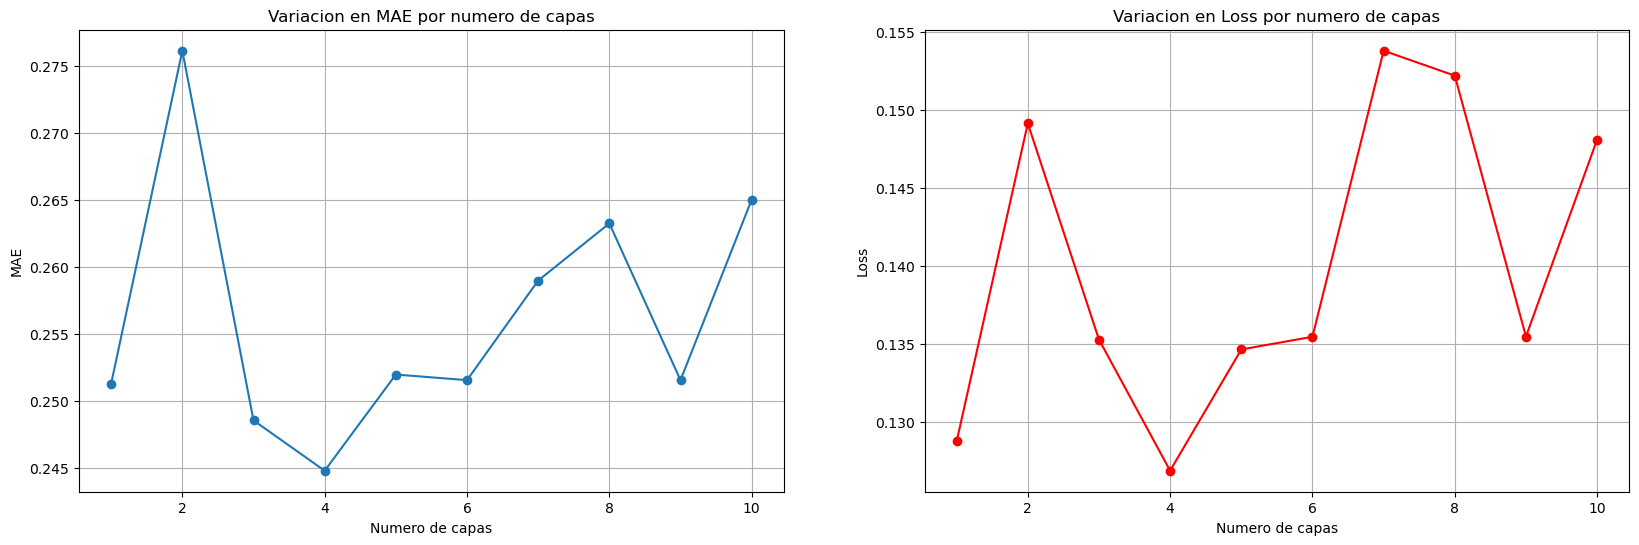

In [386]:
# Extraemos los valores para graficar
capas_values = [result[0] for result in capas_results]
capas_mae_values = [result[1] for result in capas_results]
capas_loss_values = [result[2] for result in capas_results]

# Graficamos

fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(capas_values, capas_mae_values, marker='o')
plt.xlabel('Numero de capas')
plt.ylabel('MAE')
plt.title('Variacion en MAE por numero de capas')
plt.grid(True)

# Create the loss graph
plt.subplot(1,2,2)
plt.plot(capas_values, capas_loss_values, marker='o', color='r')
plt.xlabel('Numero de capas')
plt.ylabel('Loss')
plt.title('Variacion en Loss por numero de capas')
plt.grid(True)
plt.show()

#### Regularizacion

In [388]:
# Agregamos regularización L2 a las capas ocultas
from keras.regularizers import l2

#Inicializamos el modelo
model = kr.models.Sequential()
#Agregramos la primera capa oculta, una capa densa
model.add(kr.layers.Dense(input_dim=71,units=150,activation='relu', kernel_regularizer=l2(0.01)))

#Segunda capa oculta
model.add(kr.layers.Dense(units=100,activation='relu', kernel_regularizer=l2(0.01)))

#Tercera capa oculta
model.add(kr.layers.Dense(units=50,activation='relu', kernel_regularizer=l2(0.01)))

#Capa de salida
model.add(kr.layers.Dense(units=1, activation='linear'))


#Compilamos el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

#Ajustamos el modelo
model.fit(X_train,y_train,epochs=50,batch_size=32)

#Evaluamos el modelo
loss, mae = model.evaluate(X_test, y_test)  # Métrica de MAE para regresión
print(f'{loss = },{mae = }')

Epoch 1/50
37/37 [==============================] - 2s 3ms/step - loss: 2.8073 - mae: 0.3768
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 1.9728 - mae: 0.2414
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 1.4670 - mae: 0.2171
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 1.1111 - mae: 0.2065
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.8620 - mae: 0.2031
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 0.6791 - mae: 0.1964
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.5521 - mae: 0.2019
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 0.4489 - mae: 0.1894
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 0.3786 - mae: 0.1938
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 0.3218 - mae: 0.1917
Epoch 11/50
37/37 [==============================] - 0s 3ms/step - lo

In [389]:
rango_capas = range(1, 11)
step = 1

# Ciclo
capas_results = []
for capas in rango_capas:
    # Creamos un modelo secuencial
    model = kr.models.Sequential()
    
    # Primera capa oculta
    model.add(kr.layers.Dense(input_dim=71,units=150,activation='relu', kernel_regularizer=l2(0.01)))

    #Segunda capa oculta
    model.add(kr.layers.Dense(units=100,activation='relu', kernel_regularizer=l2(0.01)))
    
    # Capas ocultas
    for _ in range(capas):
        model.add(kr.layers.Dense(units=50,activation='relu', kernel_regularizer=l2(0.01)))
    
    # Capa de salida
    model.add(kr.layers.Dense(units=1, activation='linear'))
    
    # Compilamos
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train,y_train,epochs=50,batch_size=32)

    loss, mae = model.evaluate(X_test, y_test)  # Métrica de MAE para regresión

    # Guardamos el mae de este modelo
    capas_results.append((capas, mae,loss))

Epoch 1/50
37/37 [==============================] - 2s 3ms/step - loss: 2.8176 - mae: 0.3808
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 2.0290 - mae: 0.2376
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 1.5357 - mae: 0.2161
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 1.1792 - mae: 0.2017
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.9233 - mae: 0.2037
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 0.7319 - mae: 0.1970
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.5903 - mae: 0.1975
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 0.4834 - mae: 0.1917
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 0.4029 - mae: 0.1902
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 0.3444 - mae: 0.1919
Epoch 11/50
37/37 [==============================] - 0s 2ms/step - lo

In [390]:
# Resultados
for capas, mae, loss in capas_results:
    print(f"Capas ocultas: {capas}, MAE: {mae:.4f}, Loss: {loss:.4f}")

Capas ocultas: 1, MAE: 0.2343, Loss: 0.1673
Capas ocultas: 2, MAE: 0.2243, Loss: 0.1723
Capas ocultas: 3, MAE: 0.2411, Loss: 0.1956
Capas ocultas: 4, MAE: 0.2312, Loss: 0.1990
Capas ocultas: 5, MAE: 0.2326, Loss: 0.2118
Capas ocultas: 6, MAE: 0.2302, Loss: 0.2208
Capas ocultas: 7, MAE: 0.2548, Loss: 0.2588
Capas ocultas: 8, MAE: 0.2278, Loss: 0.2498
Capas ocultas: 9, MAE: 0.2601, Loss: 0.3015
Capas ocultas: 10, MAE: 0.2690, Loss: 0.3103


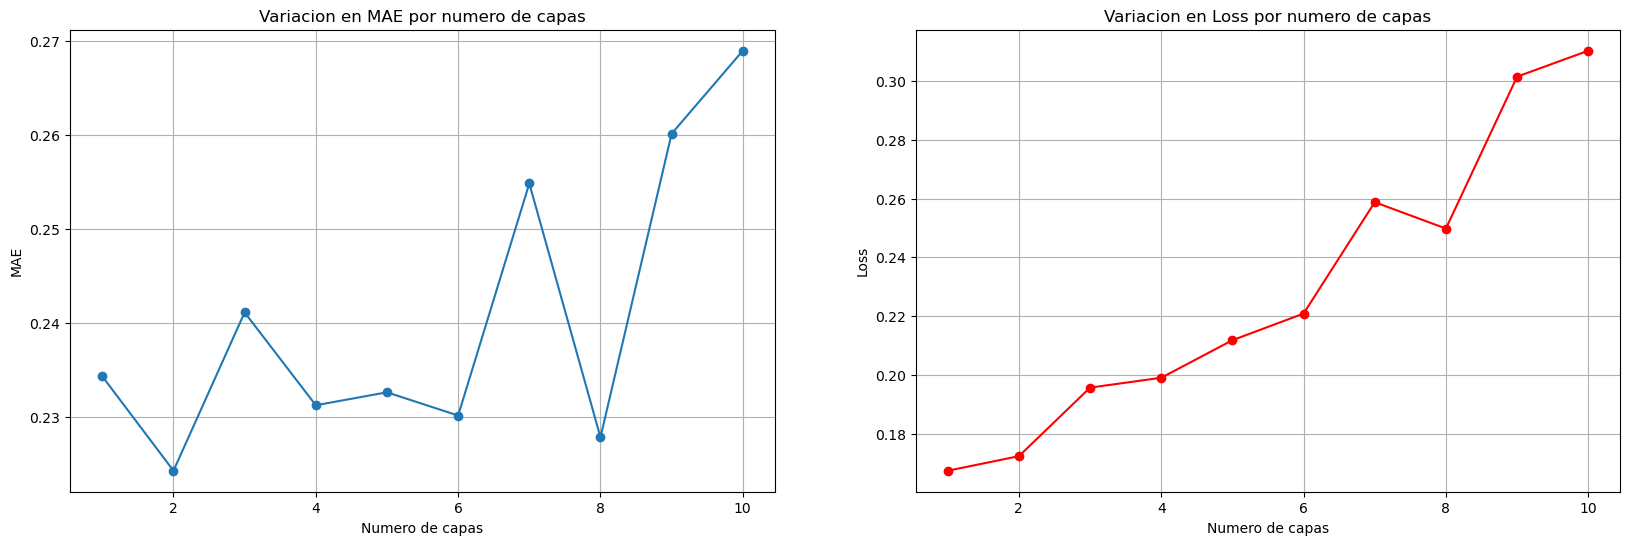

In [391]:
# Extraemos los valores para graficar
capas_values = [result[0] for result in capas_results]
capas_mae_values = [result[1] for result in capas_results]
capas_loss_values = [result[2] for result in capas_results]

# Graficamos

fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(capas_values, capas_mae_values, marker='o')
plt.xlabel('Numero de capas')
plt.ylabel('MAE')
plt.title('Variacion en MAE por numero de capas')
plt.grid(True)

# Create the loss graph
plt.subplot(1,2,2)
plt.plot(capas_values, capas_loss_values, marker='o', color='r')
plt.xlabel('Numero de capas')
plt.ylabel('Loss')
plt.title('Variacion en Loss por numero de capas')
plt.grid(True)
plt.show()